In [1]:
import glob
import gzip
import os
import shutil
import sys
import time
from datetime import date
import numpy as np
import pandas as pd
import copy

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def datetime_to_seconds(dates, ref="1900-01-01T00:00:00"):
    """from datetime64 to seconds since 1900-01-01 00:00:00"""
    return ((dates - np.datetime64(ref)) / np.timedelta64(1, "s")).astype(np.int64)

def seconds_to_datetime(seconds, ref="1900-01-01"):
    """from seconds to datetime64"""
    seconds = np.asarray(seconds)
    return pd.to_datetime(seconds, unit="s", origin=ref)

import matplotlib
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt

matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
import cv2
import numpy as np
from tkinter import Tk, filedialog
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

## CV2

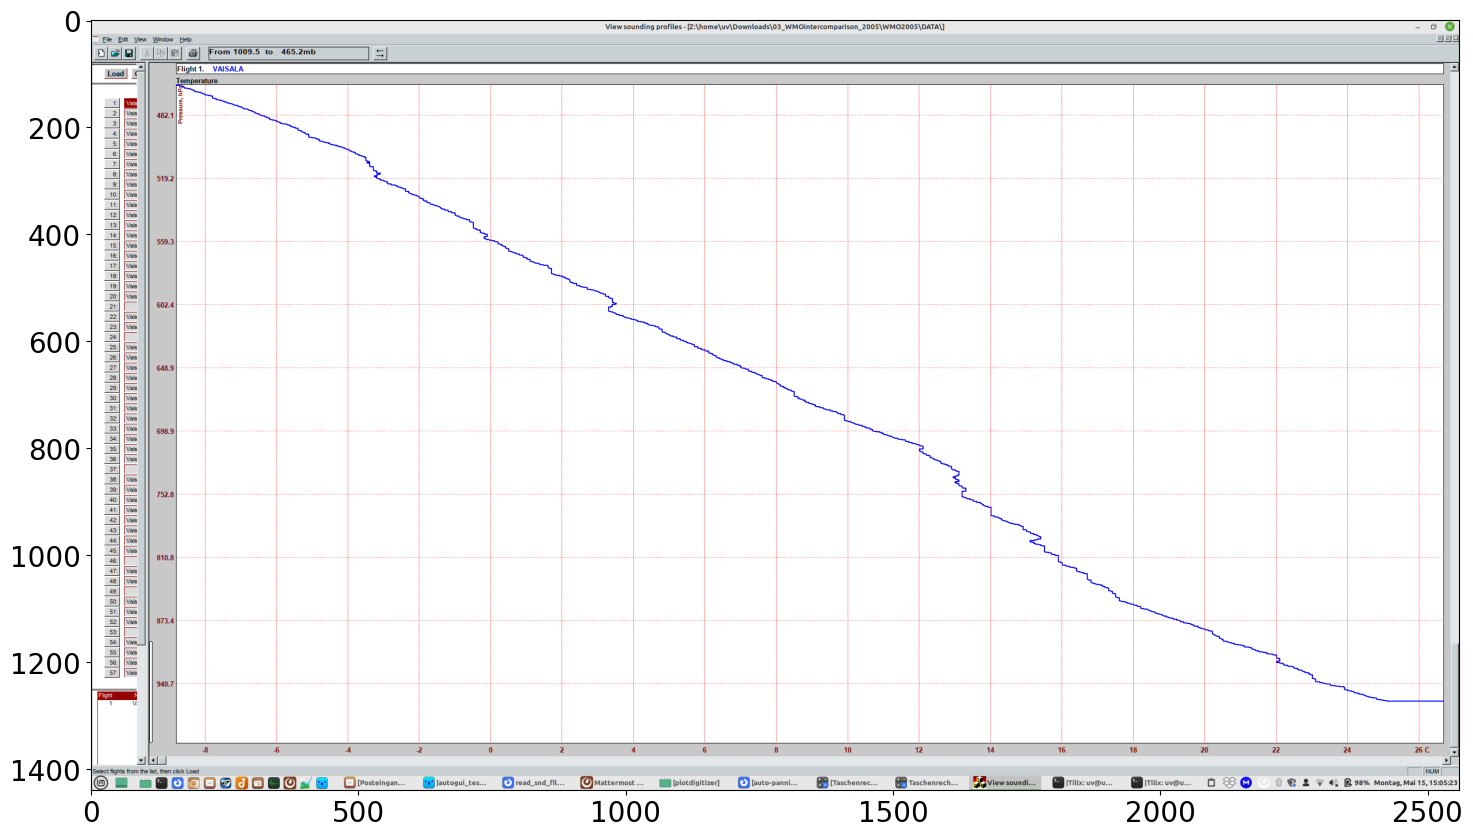

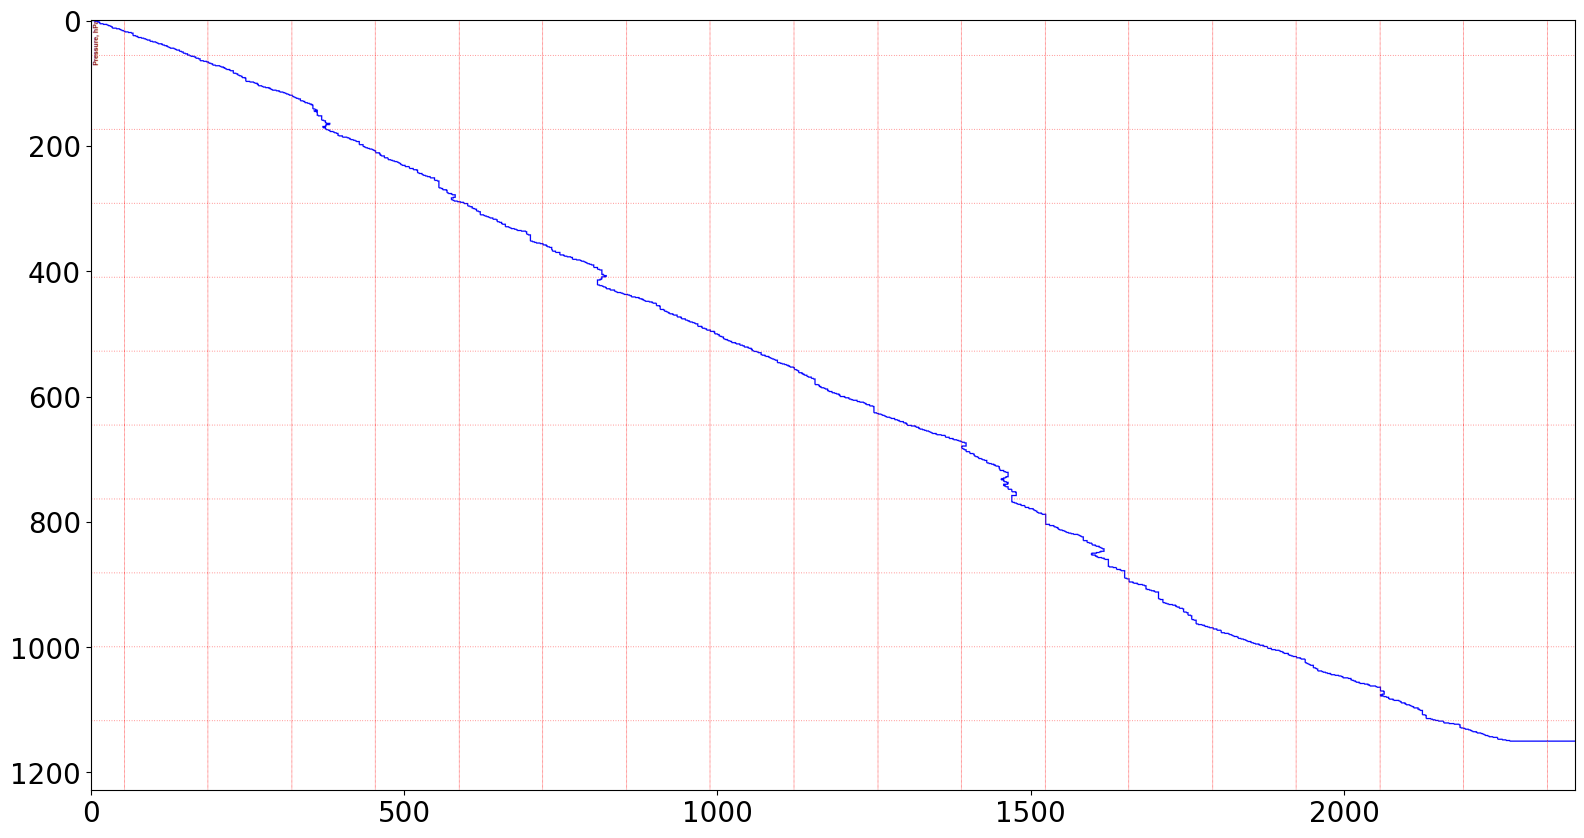

[[187 187 187 ... 190 189 188]
 [113 114 115 ... 113 113 113]]


In [28]:
%matplotlib inline
# Load the image
file = './zoomed_data/sc_Vaisala_1_6_.png'
img = cv2.imread(file)
plt.imshow(img)
plt.show()
plt.close()

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find the contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Find the contour with the largest area (i.e., the plot data)
largest_contour = max(contours, key=cv2.contourArea)

# Get the bounding box of the contour
x, y, w, h = cv2.boundingRect(largest_contour)

# Crop the image to the bounding box
plot_only = img[y+10:y+h-1, x+1:x+w-1]
relative_y = y+10
relative_x = x+1
relative_y_xaxis =  y+h-1

# Save the cropped image
cv2.imwrite('test_plot_only.png', plot_only)

# Show the cropped image
plt.imshow(plot_only)
plt.show()

# Convert the contour to a numpy array and transpose it
plot_data = largest_contour.squeeze().T

# Print the plot data
print(plot_data)

All white


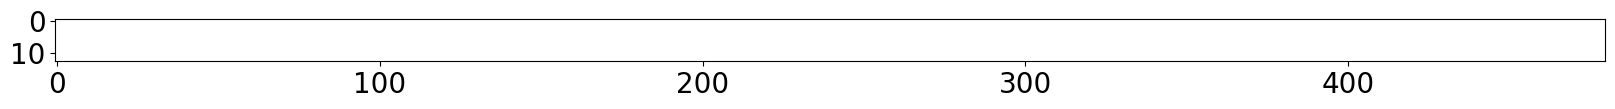

In [5]:
file = './ascent_data/sc_3therm_1.png'
img = cv2.imread(file)

image = img[ 1272:1285, 20:500]
if np.mean(image) == 255:
    print('All white')
else:
    print('Not all white')
plt.imshow(image)
plt.show()
plt.close()

Not all white


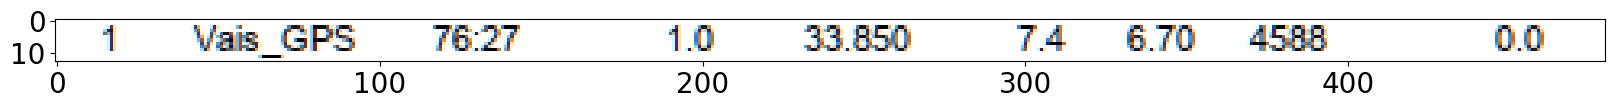

In [8]:
file = './ascent_data/sc_Vais_GPS_1.png'
img = cv2.imread(file)

image = img[ 1272:1285, 20:500]
if np.mean(image) == 255:
    print('All white')
else:
    print('Not all white')
plt.imshow(image)
plt.show()
plt.close()


Not all white


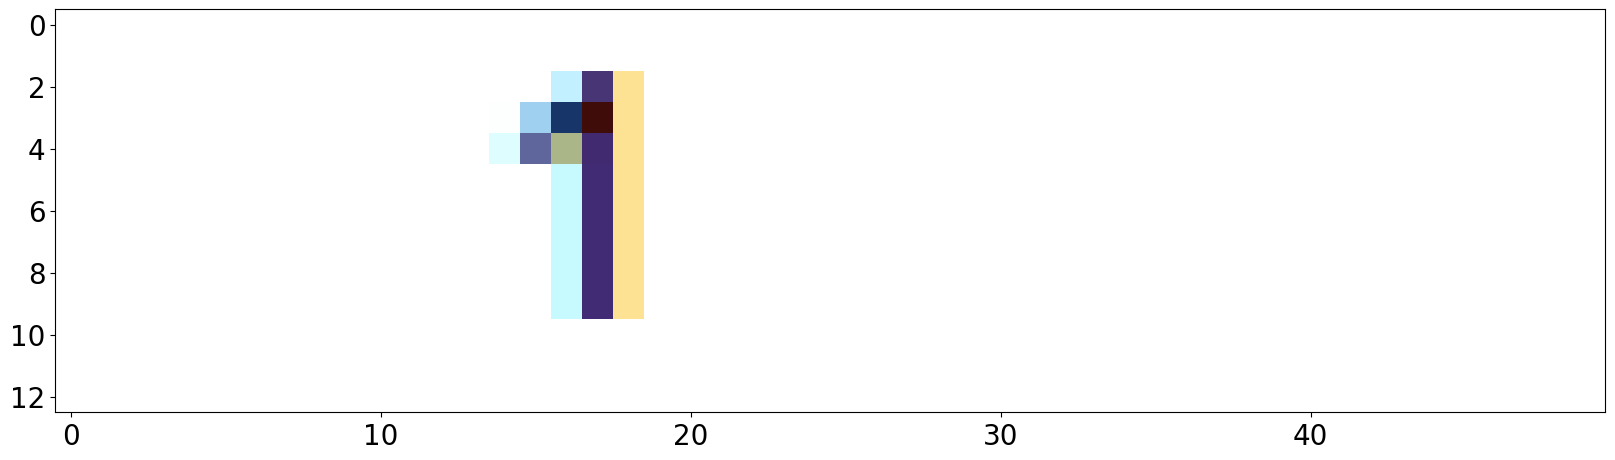

In [12]:
file = './zoomed_data/sc_Vaisala_1_0_.png'
img = cv2.imread(file)

image = img[ 1272:1285, 20:70]
if np.mean(image) == 255:
    print('All white')
else:
    print('Not all white')
plt.imshow(image)
plt.show()
plt.close()


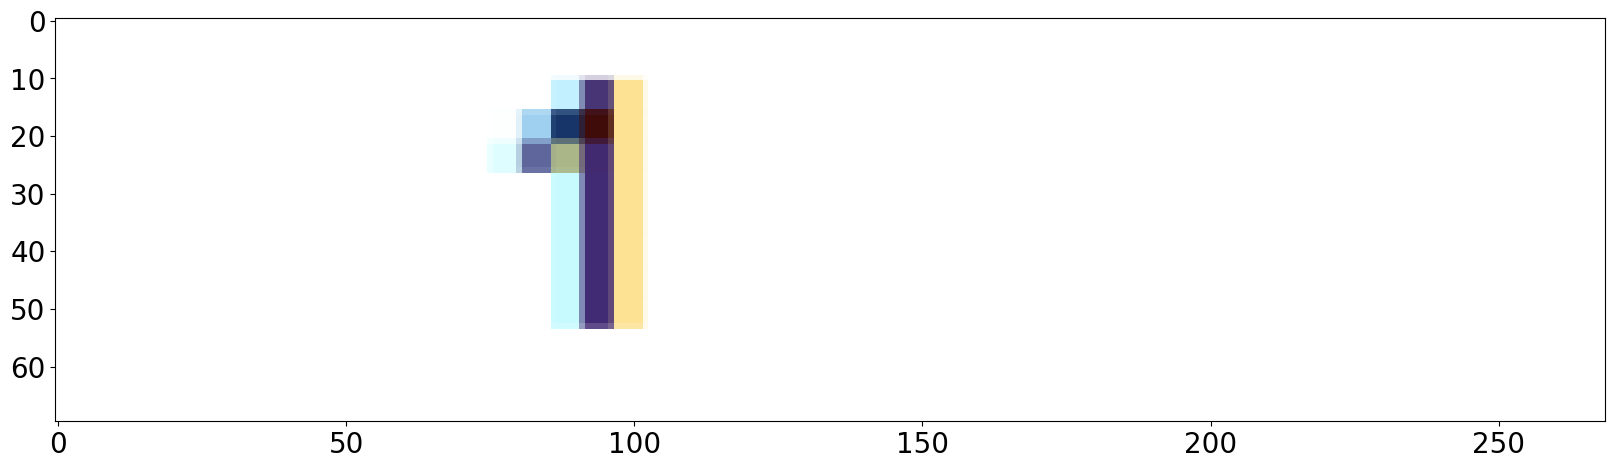

'1\n\x0c'

In [13]:
image_l = image_resize(image, height = 70)

plt.imshow(image_l)
plt.show()
plt.close()

gray = cv2.cvtColor(image_l, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
inverted = 255 - opening

data = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
data

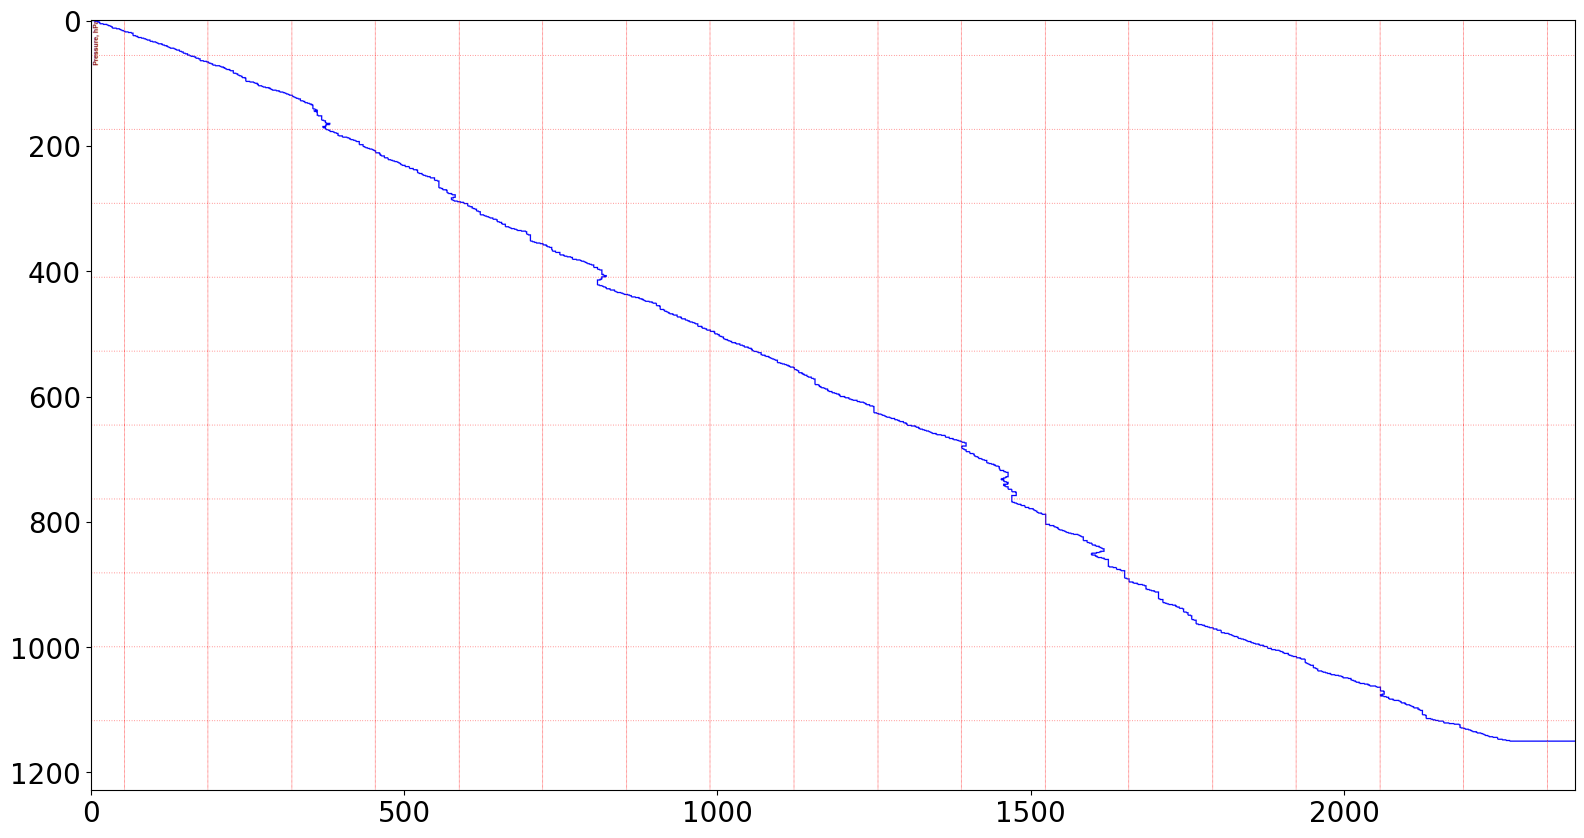

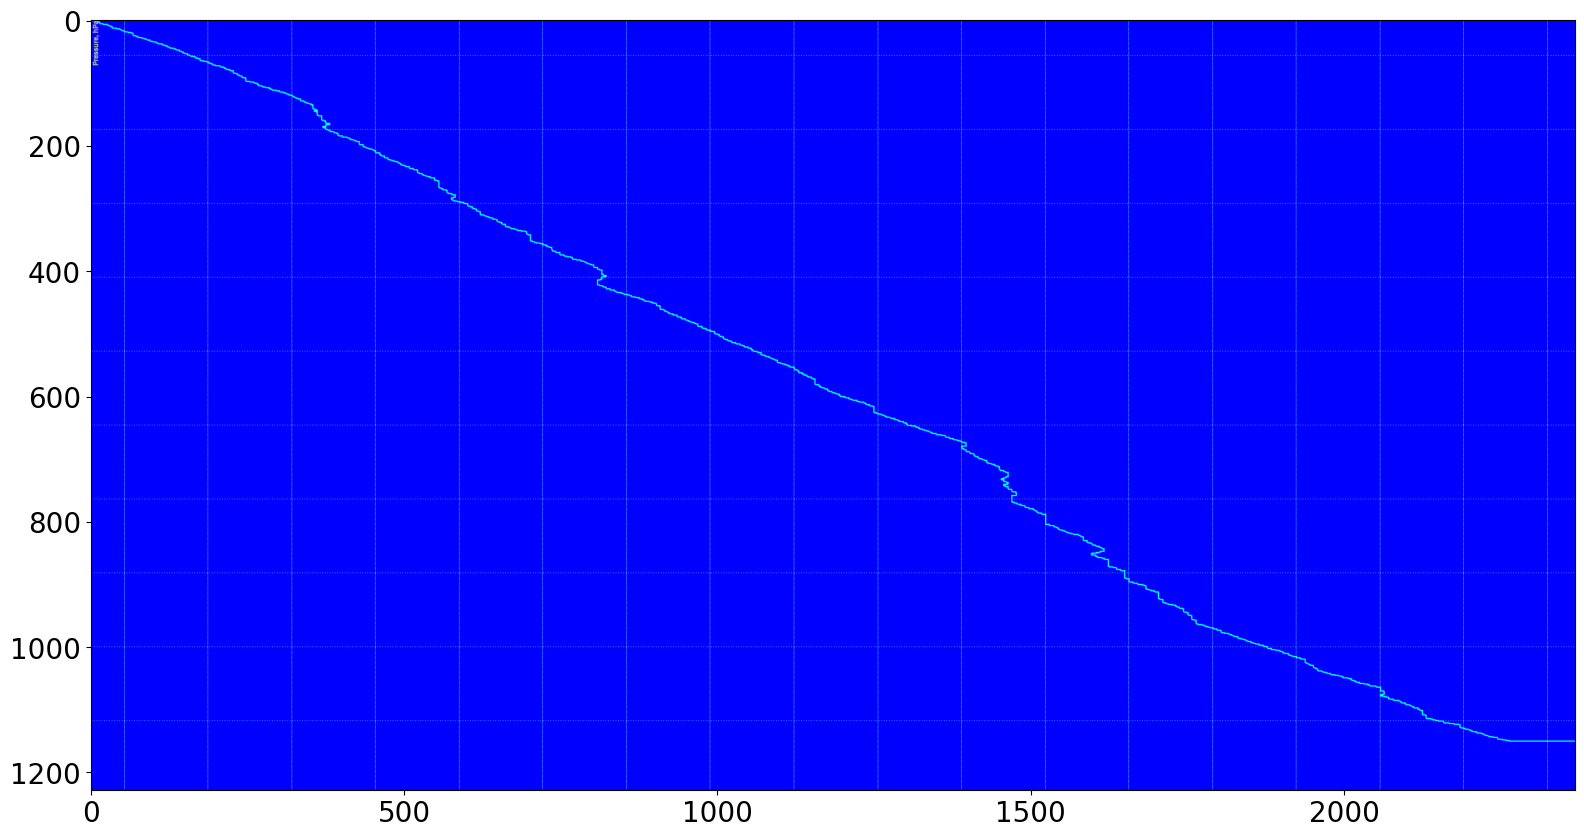

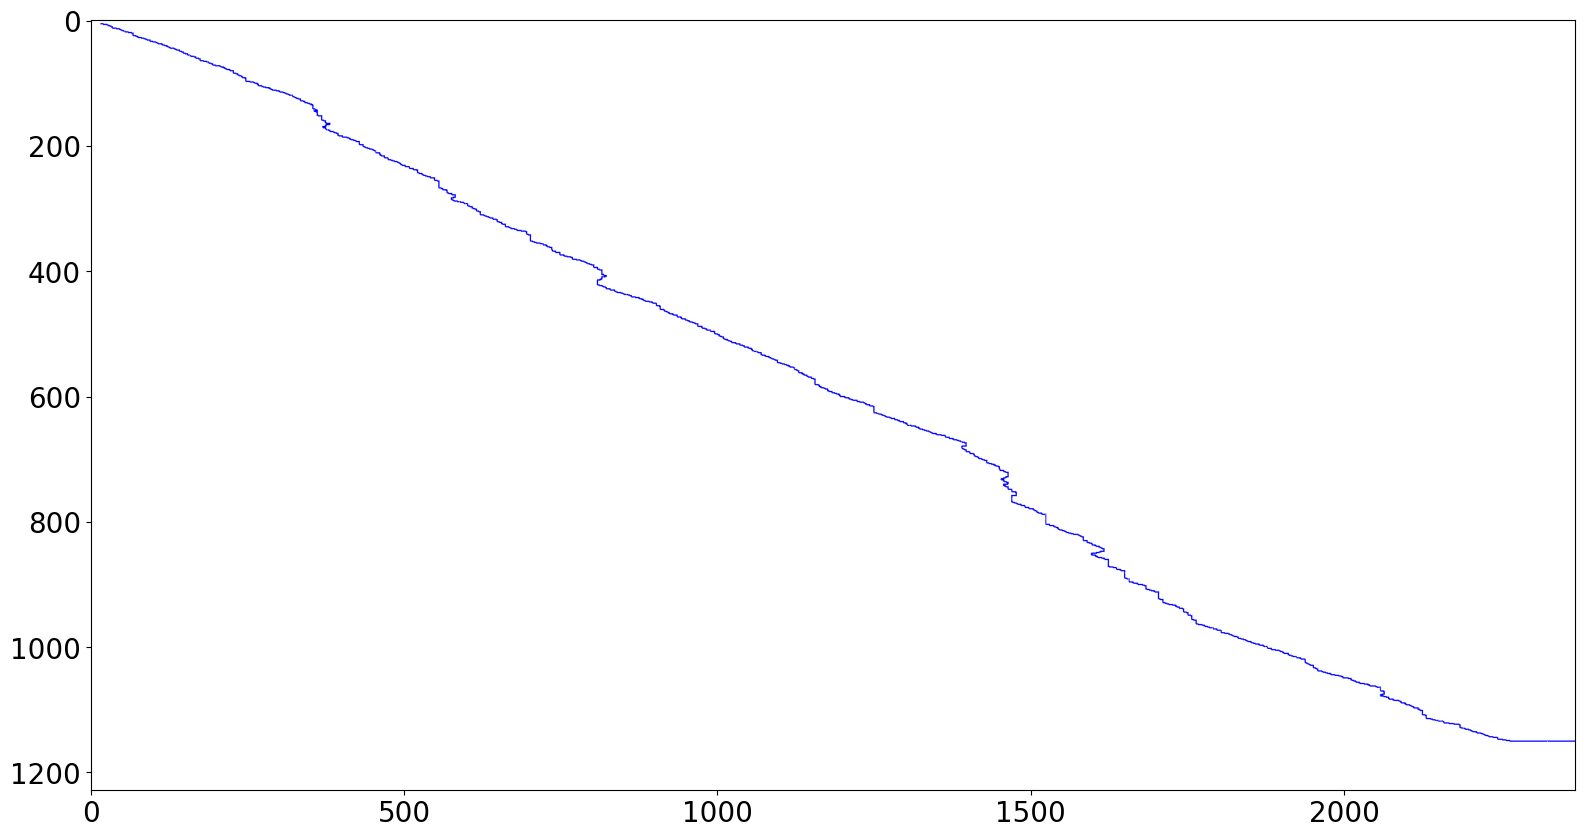

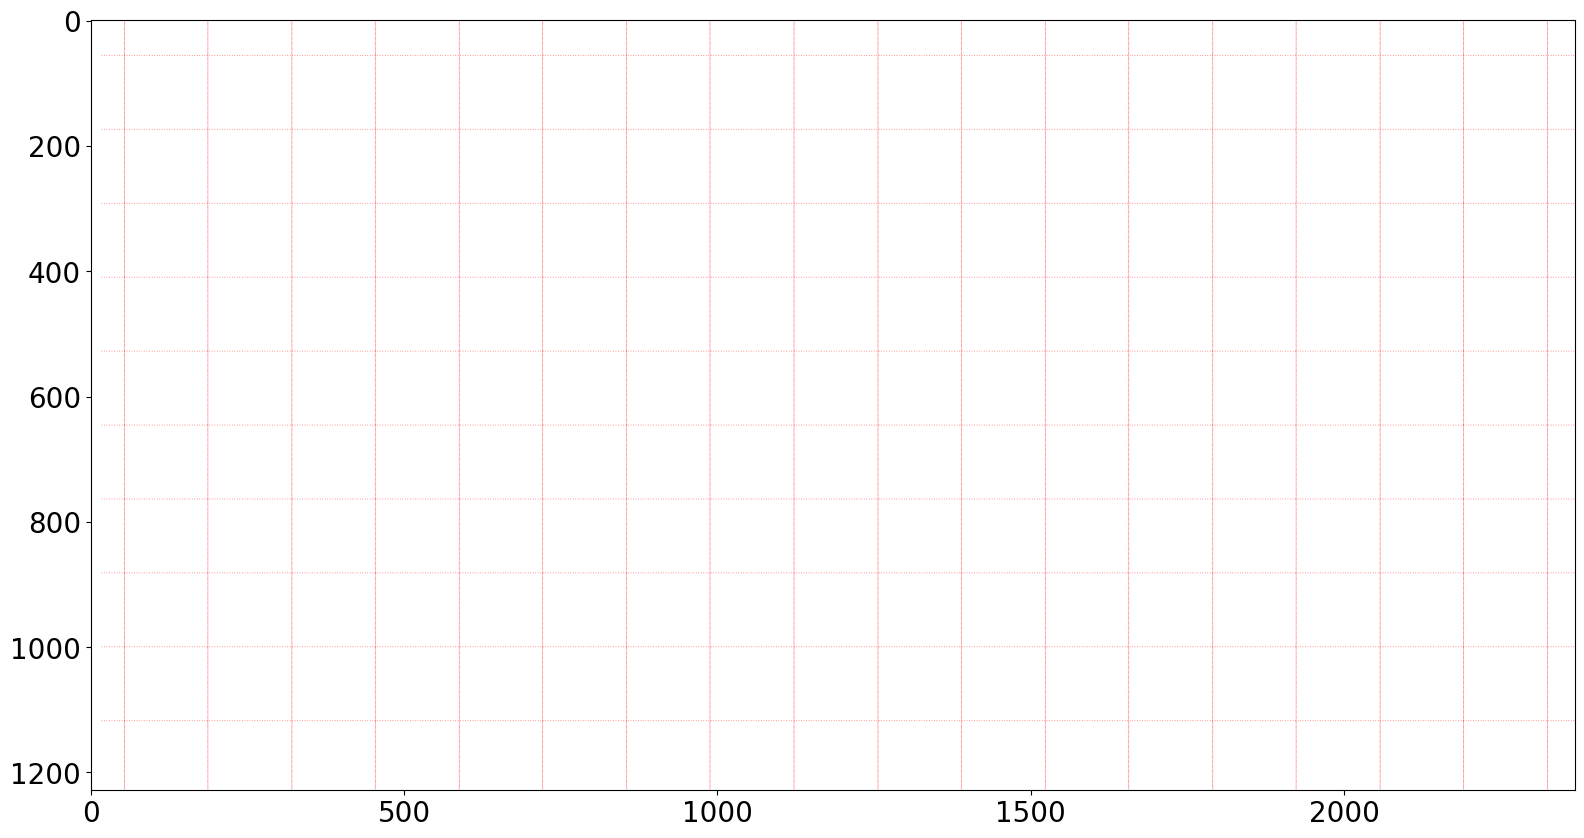

True

In [29]:
colors = {
    "black": [[180, 255, 30], [0, 0, 0]],
    "white": [[180, 18, 255], [0, 0, 231]],
    "red1": [[180, 255, 255], [159, 50, 70]],
    "red2": [[9, 255, 255], [0, 50, 70]],
    "green": [[89, 255, 255], [36, 50, 70]],
    "blue": [[128, 255, 255], [90, 50, 70]],
    "yellow": [[35, 255, 255], [25, 50, 70]],
    "purple": [[158, 255, 255], [129, 50, 70]],
    "orange": [[24, 255, 255], [10, 50, 70]],
    "gray": [[180, 18, 230], [0, 0, 40]],
}

im = cv2.imread("test_plot_only.png")
plt.imshow(im)
plt.show()
plt.close()

# Define lower and upper limits of our blue
BlueMax = np.array([128, 255, 255], np.uint8)
BlueMin = np.array([90, 50, 70], np.uint8)

# Go to HSV colourspace and get mask of blue pixels
HSV = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
plt.imshow(HSV)
plt.show()
plt.close()
mask = cv2.inRange(HSV, BlueMin, BlueMax)

# Make all pixels in mask white
grid = copy.copy(im)
grid[mask == 0] = [255, 255, 255]
grid[0:, 0:15] = [255, 255, 255]


im[mask > 0] = [255, 255, 255]
im[0:100, 0:15] = [255, 255, 255]
im[-2:, :] = [255, 255, 255]

plt.imshow(im)
plt.show()
plt.close()
plt.imshow(grid)
plt.show()
plt.close()
cv2.imwrite("test_grid_only.png", grid)
cv2.imwrite("test_data_only.png", im)

In [9]:
# %matplotlib inline

# # Read input image as Grayscale
# img = cv2.imread('test_plot_only.png', cv2.IMREAD_GRAYSCALE)

# # Convert img to uint8 binary image with values 0 and 255
# # All white pixels above 250 goes to 255, and other pixels goes to 0
# ret, thresh_gray = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY)

# # Inverse polarity
# thresh_gray = 255 - thresh_gray


# # Find contours in thresh_gray.
# contours = cv2.findContours(thresh_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  # [-2] indexing takes return value before last (due to OpenCV compatibility issues).

# corners = []

# # Iterate contours, find bounding rectangles, and add corners to a list
# for c in contours:
#     # Get bounding rectangle
#     x, y, w, h = cv2.boundingRect(c)

#     # Append corner to list of corners - format is corners[i] holds a tuple: ((x0, y0), (x1, y1))
#     corners.append(((x, y), (x+w, y+h)))

# # Convert grayscale to BGR (just for testing - for drawing rectangles in green color).
# out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# # Draw green rectangle (for testing)
# for c in corners[:]:
#     cv2.rectangle(out, c[0], c[1], (0, 255, 0), thickness = 2)
#     # print(c)

# # cv2.imwrite('out.png', out)  #Save out to file (for testing).


# plt.imshow(out)
# plt.show()
# plt.close()

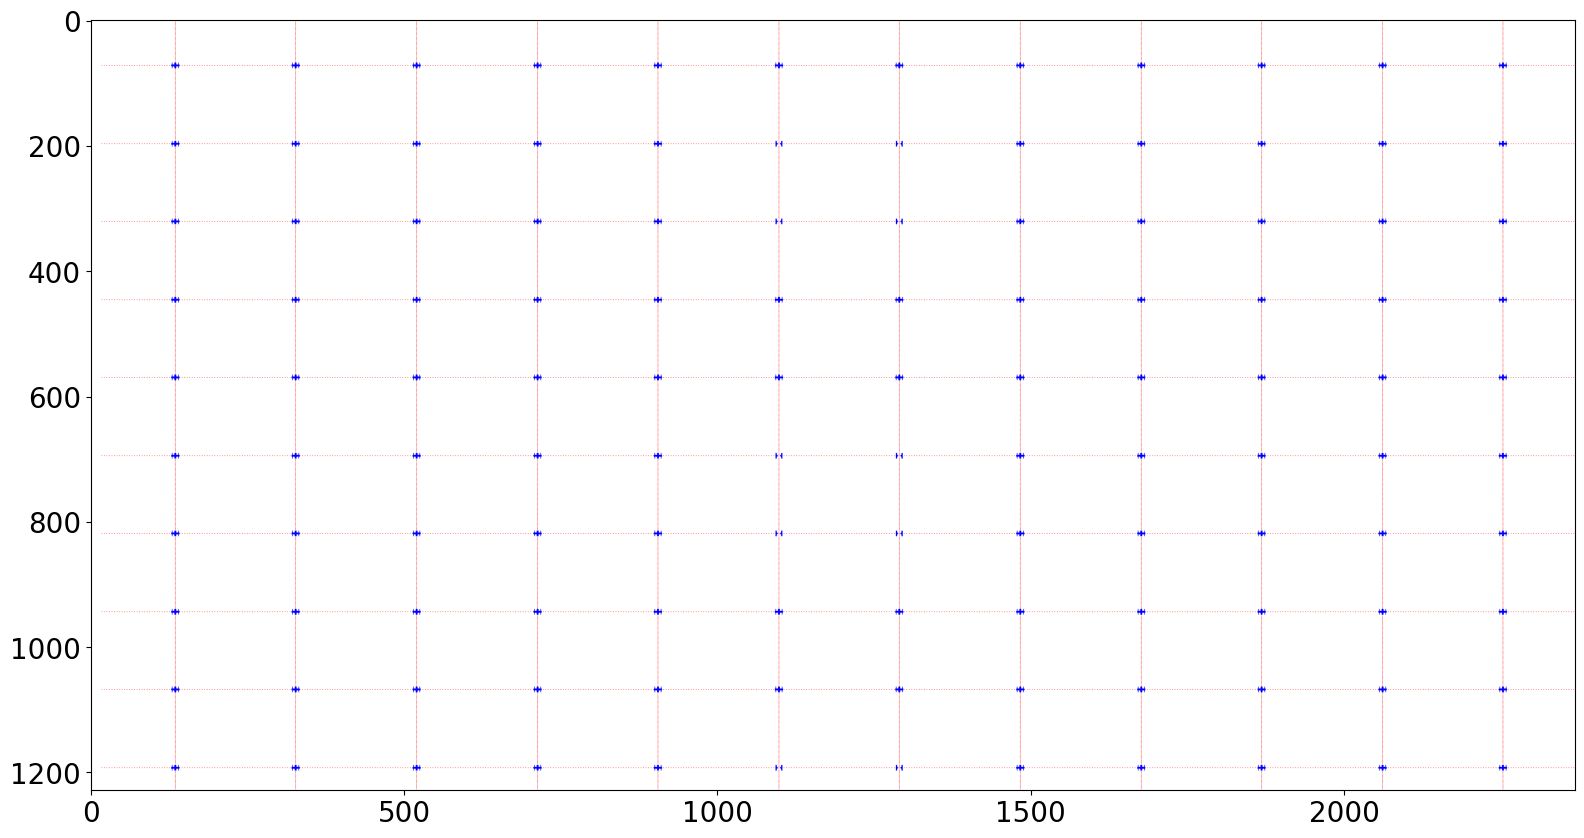

In [15]:
img = cv2.imread('test_grid_only.png')

# convert image to gray
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#threshold gray image to b and w
ret,thresh2 = cv2.threshold(im_gray,120,255,cv2.THRESH_BINARY_INV)

# dilate and erode image
kernel = np.ones((3,3), np.uint8)
img_dilation = cv2.dilate(thresh2, kernel, iterations=2)

kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)

# detect corners
gray = np.float32(img_erosion)
dst = cv2.cornerHarris(im_gray,5,19,0.07)

dst = cv2.dilate(dst,None,iterations=0)

img[dst>0.1*dst.max()]=[0,0,255]

plt.imshow(img)
plt.show()
plt.close()

# cv2.imwrite('dst.png', dst)
# cv2.imwrite('img2.png', img)

### Add a mean function over mote points of values for one corner point -> is it more "middle"?

min:  (129, 71)
max:  (2257, 1194)
mean:  (1481, 573)


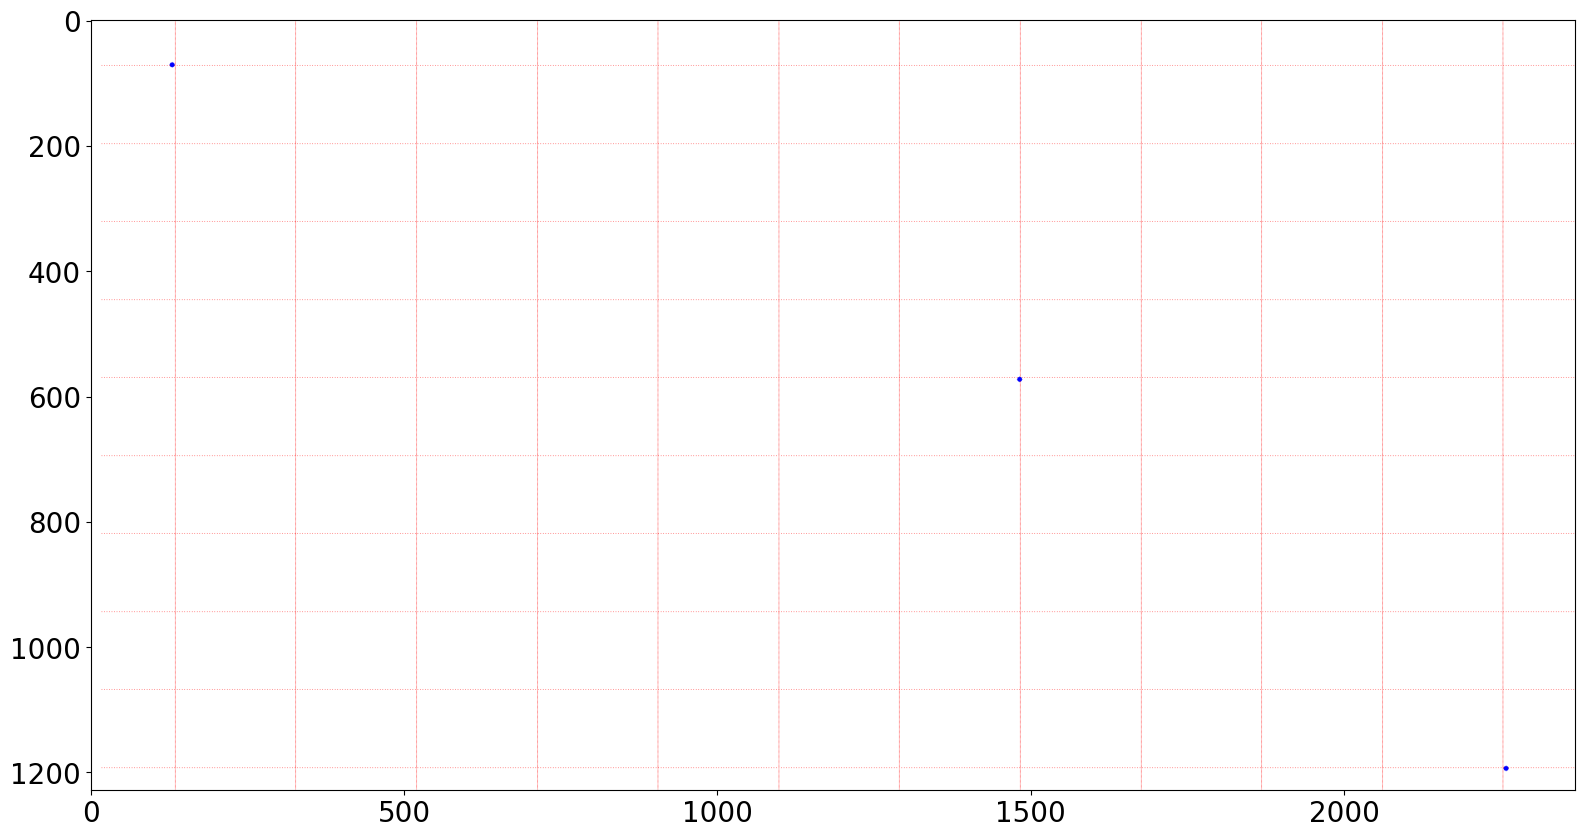

In [16]:
img = cv2.imread('test_grid_only.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
# dst = cv2.cornerHarris(gray,2,3,0.04)
# dst = cv2.cornerHarris(gray, 2, 3, 0.01)
dst = cv2.cornerHarris(gray, 5,19,0.07)


# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
indices = np.where(dst > 0.80 * dst.max())
coordinates = zip(indices[1], indices[0])
coordinates = list(coordinates)

meancoord = coordinates[int(len(coordinates)/2)]
maxcoord = np.argmax(np.sum(coordinates, axis = 1))
mincoord = np.argmin(np.sum(coordinates, axis = 1))

coords_mean = meancoord
coords_low = coordinates[mincoord]
coords_high = coordinates[maxcoord]
img = cv2.circle(img, coords_mean, radius=4, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, coords_low, radius=4, color=(0, 0, 255), thickness=-1)
img = cv2.circle(img, coords_high, radius=4, color=(0, 0, 255), thickness=-1)
print('min: ', coords_low)
print('max: ', coords_high)
print('mean: ', coords_mean)


plt.imshow(img)
plt.show()
plt.close()


low_y:  [ne



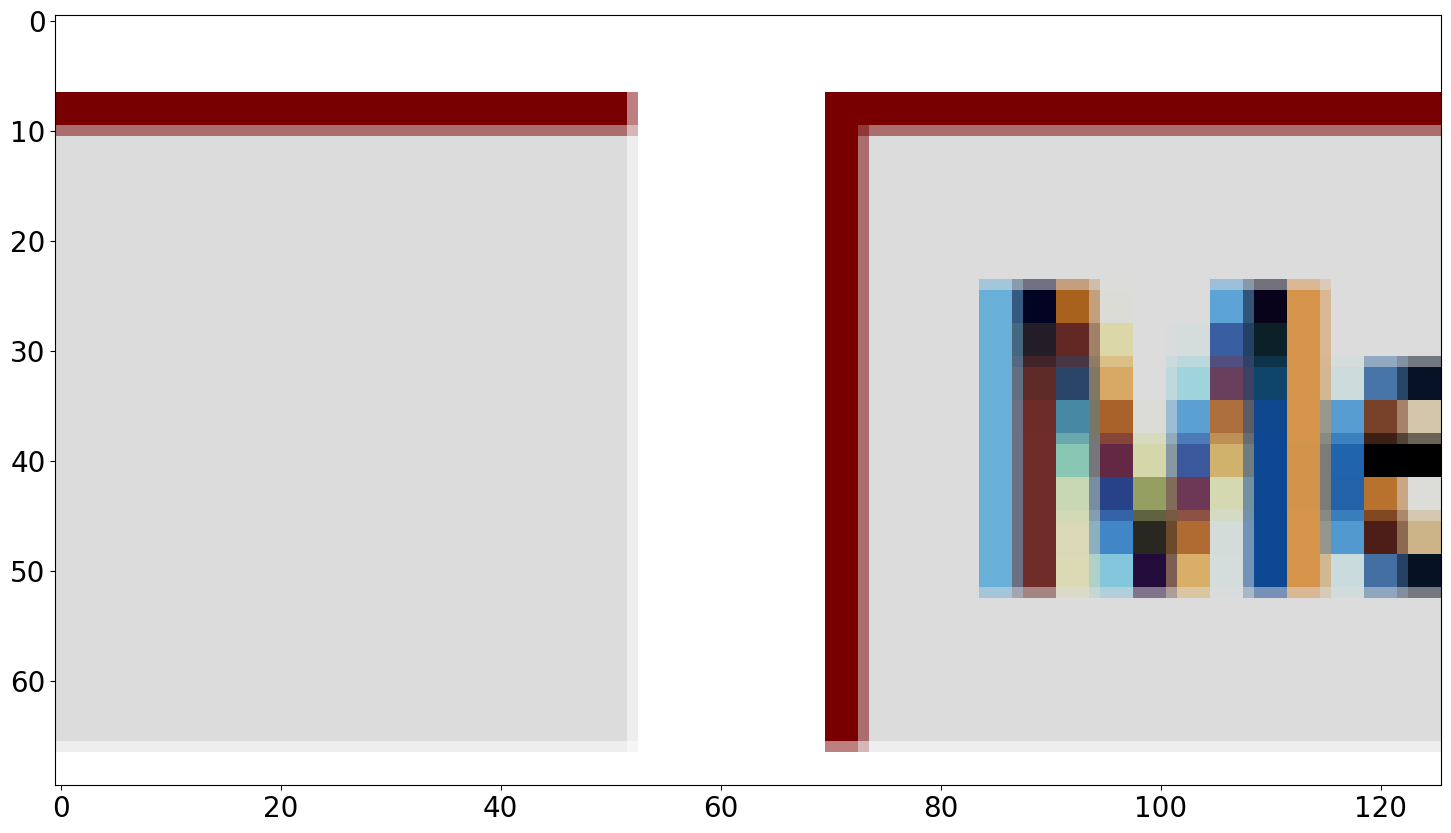

high_y:  


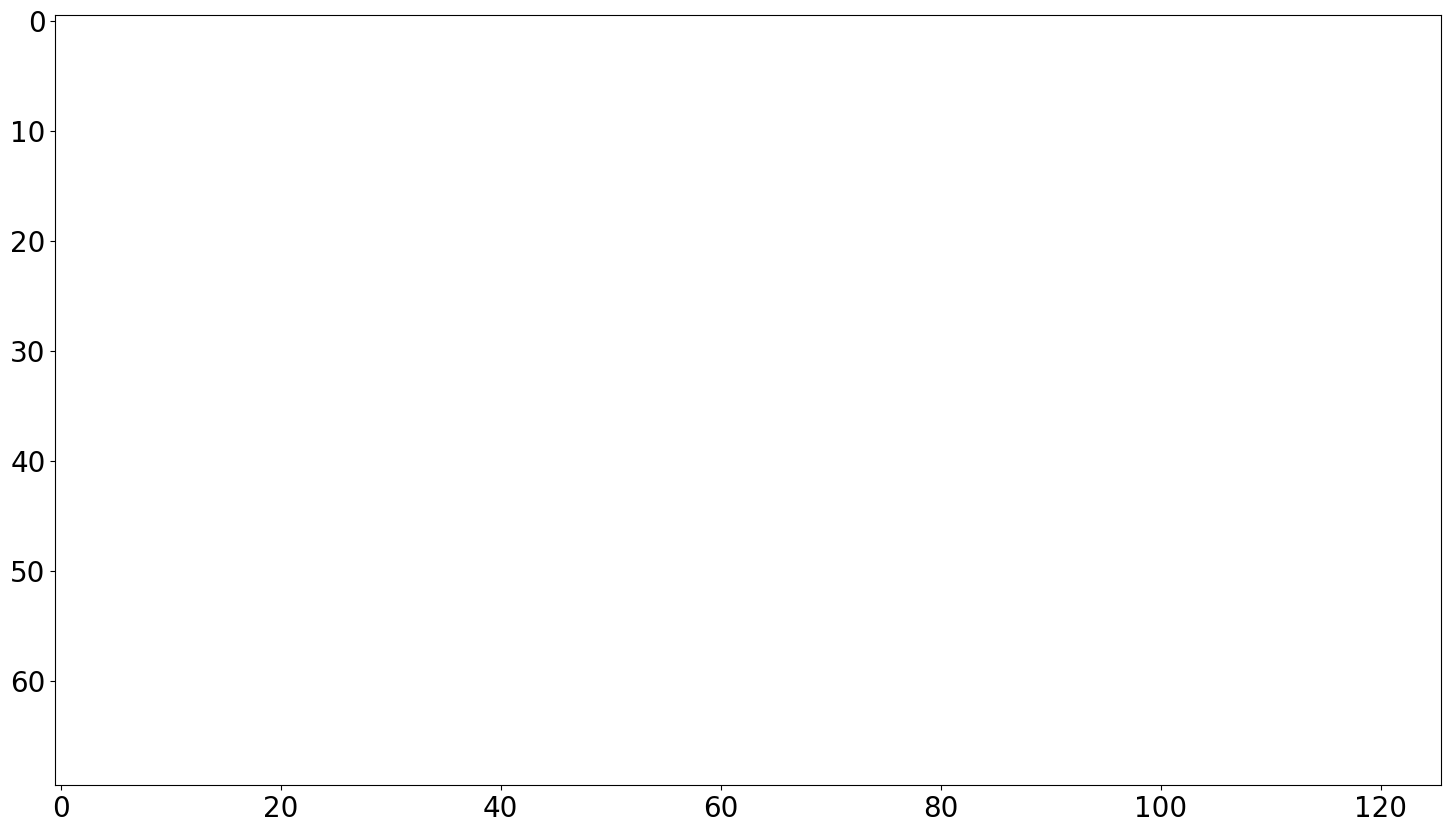

low_x:  


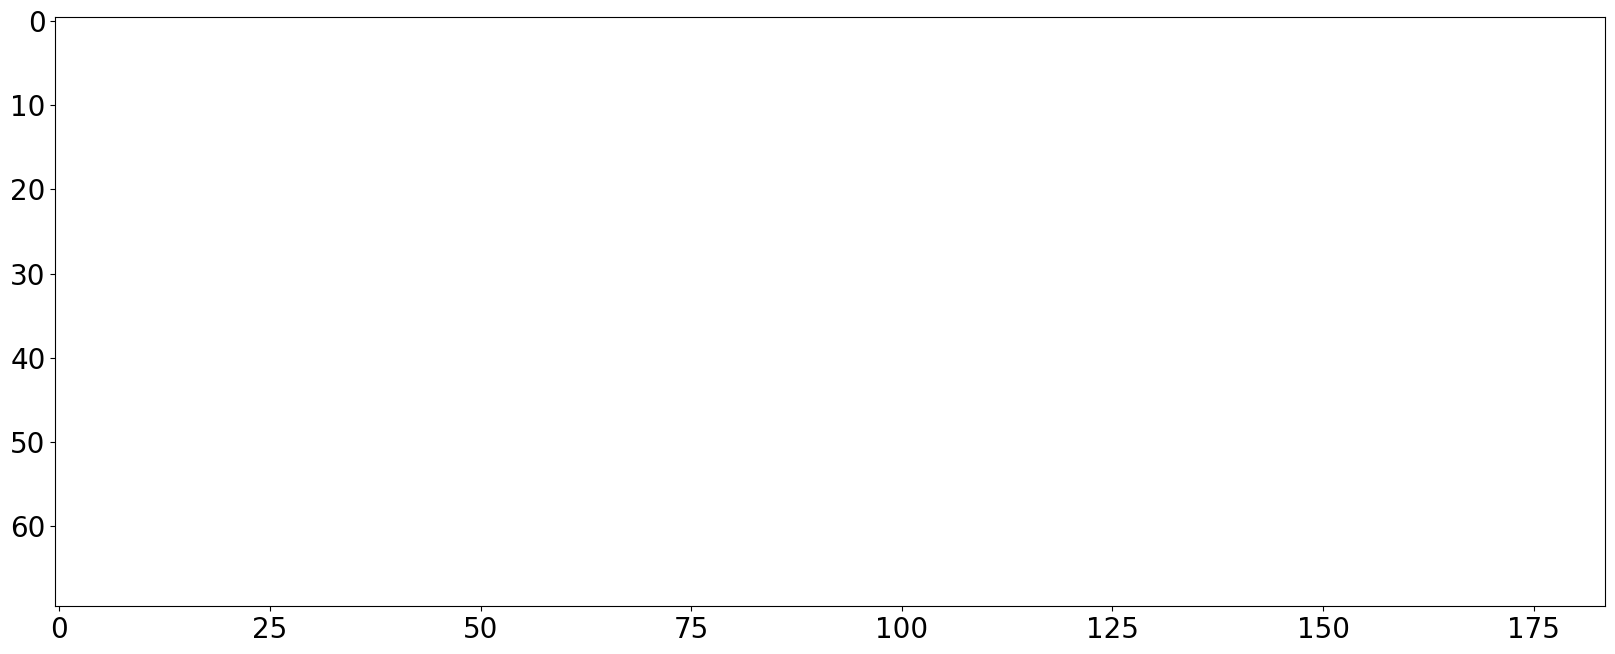

high_x:  


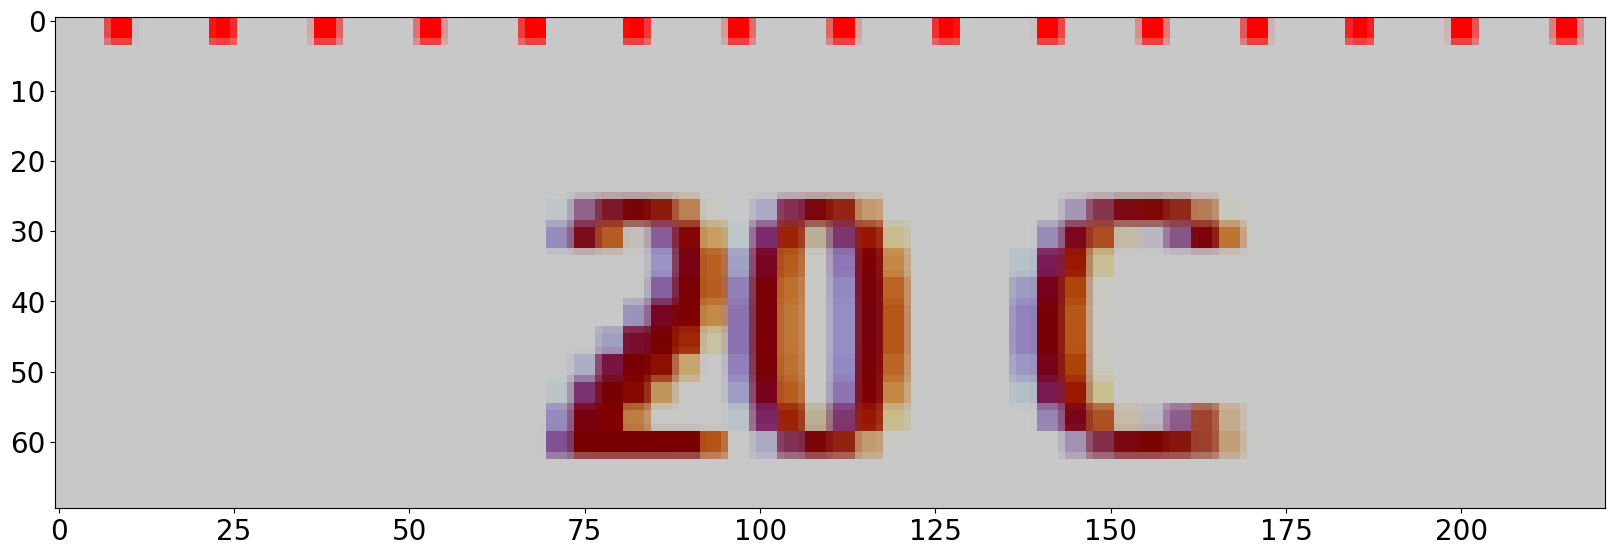

In [17]:
file = './ascent_data/sc_Vais_GPS_1.png'
img = cv2.imread(file)



low_y_label = img[relative_y + coords_low[1]-10: relative_y + coords_low[1]+10, relative_x-37:relative_x-1]
low_y_label = image_resize(low_y_label, height = 70)

gray = cv2.cvtColor(low_y_label, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
inverted = 255 - opening

low_y_val = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
print("low_y: ", low_y_val)

plt.imshow(low_y_label)
plt.show()
plt.close()



high_y_label = img[relative_y + coords_high[1]-10: relative_y + coords_high[1]+10, relative_x-37:relative_x-1]
high_y_label = image_resize(high_y_label, height = 70)

gray = cv2.cvtColor(high_y_label, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
inverted = 255 - opening

high_y_val = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
print("high_y: ", high_y_val)

plt.imshow(high_y_label)
plt.show()
plt.close()



# mean_y_label = img[relative_y + coords_mean[1]-10: relative_y + coords_mean[1]+10, relative_x-37:relative_x-1]
# mean_y_label = image_resize(mean_y_label, height = 70)

# gray = cv2.cvtColor(mean_y_label, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)
# thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Morph open to remove noise and invert image
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
# inverted = 255 - opening

# mean_y_val = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
# print("mean_y: ", mean_y_val)

# plt.imshow(mean_y_label)
# plt.show()
# plt.close()



low_x_label = img[relative_y_xaxis+1 : relative_y_xaxis+20, relative_x+coords_low[0]-20:relative_x+coords_low[0]+30]
low_x_label = image_resize(low_x_label, height = 70)

gray = cv2.cvtColor(low_x_label, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
inverted = 255 - opening

low_x_val = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
print("low_x: ", low_x_val)

plt.imshow(low_x_label)
plt.show()
plt.close()



high_x_label = img[relative_y_xaxis+1 : relative_y_xaxis+20, relative_x+coords_high[0]-30:relative_x+coords_high[0]+30]
high_x_label = image_resize(high_x_label, height = 70)

gray = cv2.cvtColor(high_x_label, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
inverted = 255 - opening

high_x_val = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
print("high_x: ", high_x_val)

plt.imshow(high_x_label)
plt.show()
plt.close()


# mean_x_label = img[relative_y_xaxis+1 : relative_y_xaxis+20, relative_x+coords_mean[0]-30:relative_x+coords_mean[0]+30]
# mean_x_label = image_resize(mean_x_label, height = 70)

# gray = cv2.cvtColor(mean_x_label, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (3,3), 0)
# thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# # Morph open to remove noise and invert image
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
# inverted = 255 - opening

# mean_x_val = pytesseract.image_to_string(inverted, lang='eng', config= '--psm 6')
# print("mean_x: ", mean_x_val)

# plt.imshow(mean_x_label)
# plt.show()
# plt.close()

In [13]:
from string import ascii_letters, punctuation, whitespace
ignore = ascii_letters + punctuation + whitespace


In [14]:
print('low: ',coords_low, low_x_val, low_y_val)
print('high: ',coords_high, high_x_val, high_y_val)
xa_p = [coords_low[0], coords_high[0]]
xa_v = [273.15+int("".join([x for x in low_x_val.split('\n\x0c')[0]  if x.isdigit() or x=='-'])), 273.15+int("".join([x for x in high_x_val.split('\n\x0c')[0]  if x.isdigit() or x=='-']))]
ya_p = [coords_low[1], coords_high[1]]
ya_v = [int("".join([x for x in low_y_val.split('\n\x0c')[0]  if x.isdigit() or x=='-'])), int("".join([x for x in high_y_val.split('\n\x0c')[0]  if x.isdigit() or x=='-']))]

low:  (18, 62) -80
 8

high:  (1750, 1085) 20C
 559



In [15]:
xa_p, xa_v, ya_p, ya_v

([18, 1750], [193.14999999999998, 293.15], [62, 1085], [8, 559])

In [16]:
display(xa_p)
display(xa_v)
display(ya_p)
display(ya_v)

[18, 1750]

[193.14999999999998, 293.15]

[62, 1085]

[8, 559]

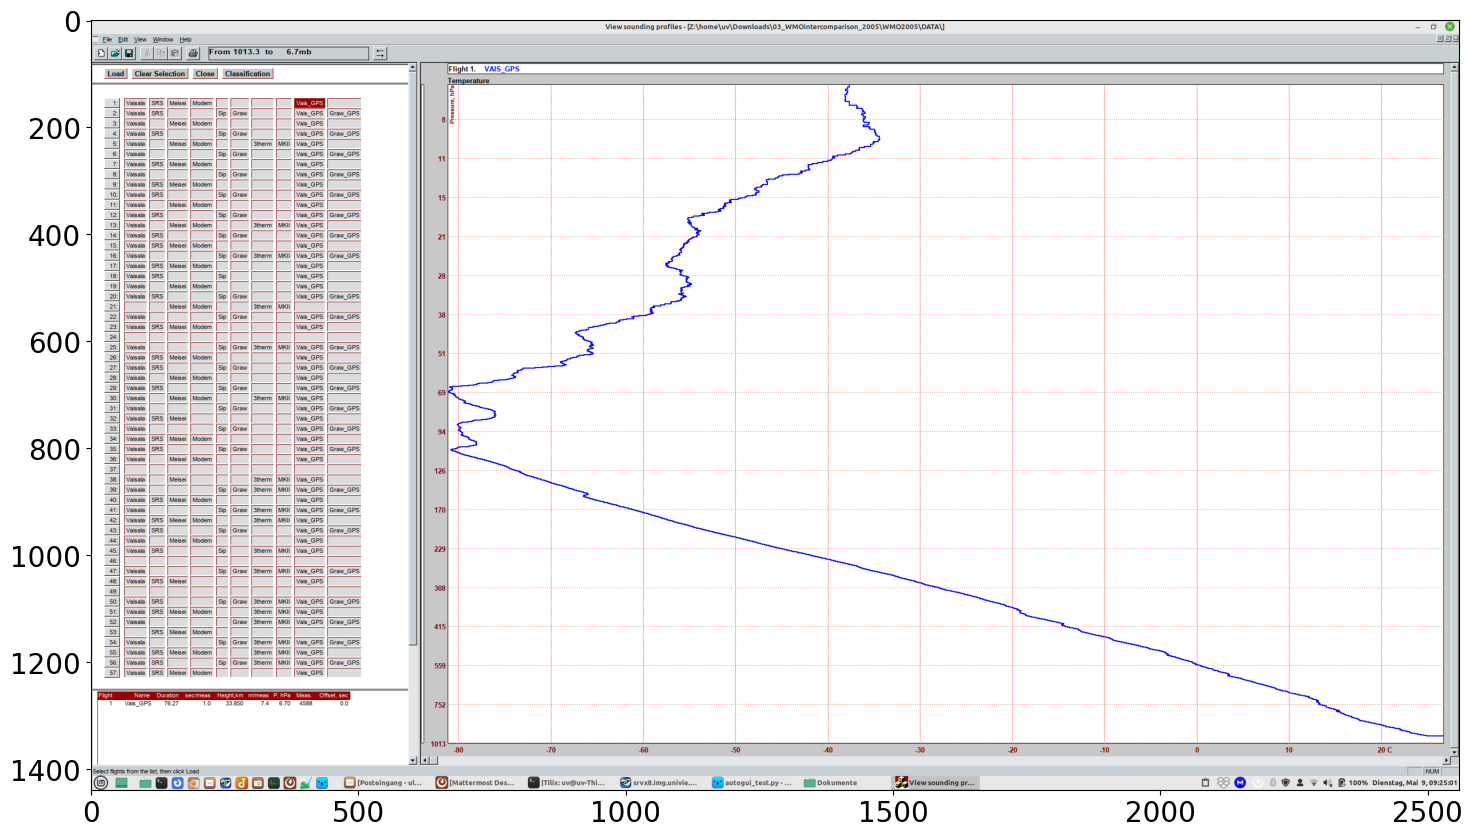

In [17]:
file = './ascent_data/sc_Vais_GPS_1.png'
img = cv2.imread(file)
plt.imshow(img)
plt.show()
plt.close()

In [18]:
x1 = xa_p[0] # 364
a = xa_v[0] # 213.15
x2 = xa_p[1] # 1746
b = xa_v[1] # 293.15

# Berechnung der Steigung m
m_T = (b - a) / (x2 - x1)
# Berechnung des y-Achsenabschnitts c
c_T = a - m_T * x1
def T(x):
    return m_T * x + c_T




In [19]:
T(0) 

192.11073903002307

In [20]:
T(1750) 

293.15

In [21]:
y1 = ya_p[0] # 63
ap = np.log(ya_v[0]) # np.log(8)
y2 = ya_p[1] # 1085
bp = np.log(ya_v[1]) # np.log(559)

# Berechnung der Steigung m
m = (bp - ap) / (y2 - y1)
# Berechnung des y-Achsenabschnitts c
c = ap - m * y1
def P(x):
    # return np.exp(m * x + c) # exp after the calculation?
    return m * x + c


In [22]:
P(0)

1.8220653034086076

In [23]:
np.exp(P(1200))

901.0320989160614

In [24]:
T(1)

192.16847575057733

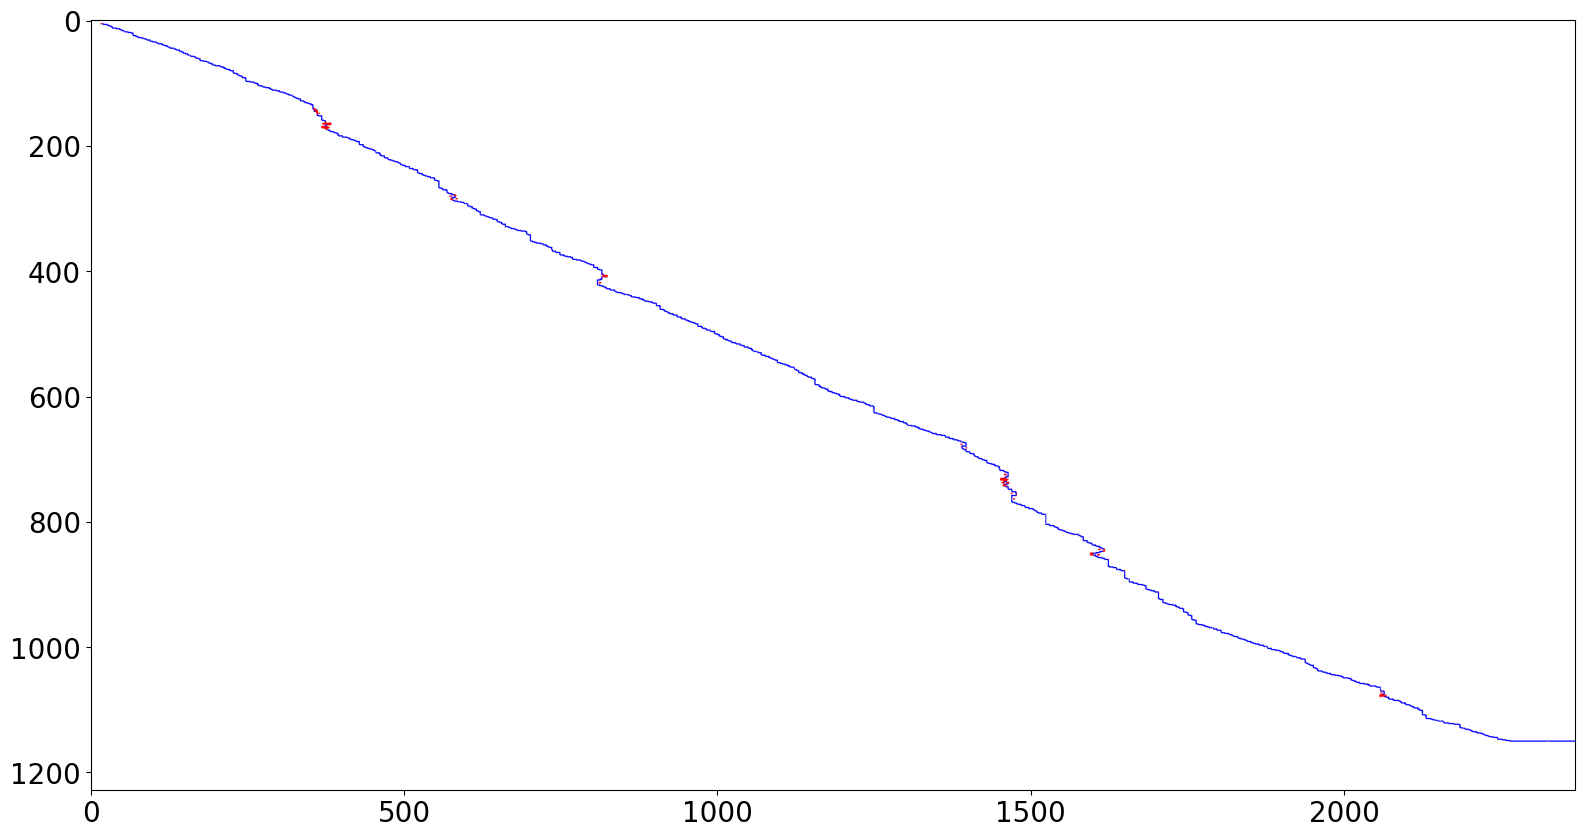

In [31]:
img = cv2.imread('test_data_only.png')

# convert image to gray
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#threshold gray image to b and w
ret,thresh2 = cv2.threshold(im_gray,120,255,cv2.THRESH_BINARY_INV)

# dilate and erode image
kernel = np.ones((3,3), np.uint8)
img_dilation = cv2.dilate(thresh2, kernel, iterations=2)

kernel = np.ones((5,5), np.uint8)
img_erosion = cv2.erode(img_dilation, kernel, iterations=1)

# detect corners
gray = np.float32(img_erosion)
dst = cv2.cornerHarris(im_gray,5,19,0.07)

dst = cv2.dilate(dst,None,iterations=0)

img[dst>0.1*dst.max()]=[255,0,0]

plt.imshow(img)
plt.show()
plt.close()

# cv2.imwrite('dst.png', dst)
# cv2.imwrite('img2.png', img)

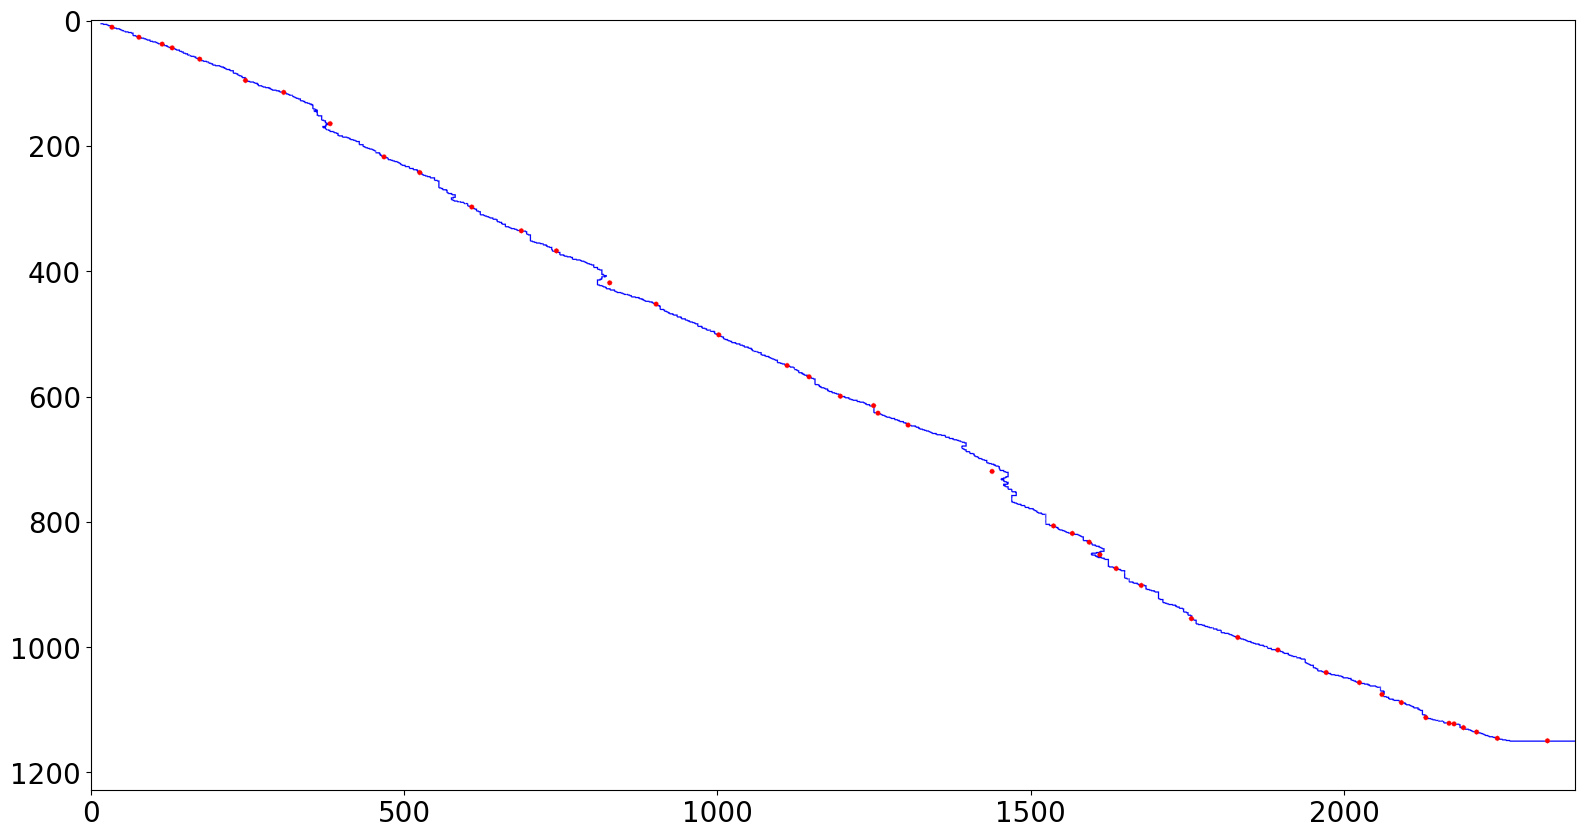

In [33]:
def find_centroids(dst):
    ret, dst = cv2.threshold(dst, 0.01 * dst.max(), 255, 0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 
                0.001)
    # corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5), 
    #           (-1,-1),criteria)
    corners = cv2.cornerSubPix(gray,np.float32(centroids[1:]),(5,5), 
          (-1,-1),criteria)
    return corners

image = cv2.imread('test_data_only.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 3, 3, 0.04)

dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image.
# image[dst > 0.01*dst.max()] = [0, 0, 255]

# Get coordinates
corners = find_centroids(dst)
# To draw the corners
for corner in corners:
    image[int(corner[1]), int(corner[0])] = [0, 0, 255]
int_corners = np.asarray(corners, dtype = int)
for co in int_corners:
    image = cv2.circle(image, co, radius=4, color=(255, 0, 0), thickness=-1)
plt.imshow(image)
plt.show()
plt.close()

In [25]:
print (int_corners)

[[1182  613]
 [1732    2]
 [1714   28]
 [1732   27]
 [1694   28]
 [1694   52]
 [1655   52]
 [1675   52]
 [1655   76]
 [1675   76]
 [1694   76]
 [1686  100]
 [1694   99]
 [1675  100]
 [1636  123]
 [1676  123]
 [1636  147]
 [1655  147]
 [1643  197]
 [1655  191]
 [1656  214]
 [1675  214]
 [1732  214]
 [1732  257]
 [1867  257]
 [1886  257]
 [1886  278]
 [1901  279]
 [1898  287]
 [1886  299]
 [1946  300]
 [2002  300]
 [2012  323]
 [2002  340]
 [2023  341]
 [2040  341]
 [2055  357]
 [2002  362]
 [1992  372]
 [1982  381]
 [2003  382]
 [2021  382]
 [2021  401]
 [2042  402]
 [2061  402]
 [2061  420]
 [2031  430]
 [2021  440]
 [2021  459]
 [2041  478]
 [2060  478]
 [2090  479]
 [2137  479]
 [2118  497]
 [2137  497]
 [2118  514]
 [2021  515]
 [2060  515]
 [2071  515]
 [2021  533]
 [2060  533]
 [2157  533]
 [2137  552]
 [2160  554]
 [2212  569]
 [2252  587]
 [2273  587]
 [2259  600]
 [2272  604]
 [2272  621]
 [2287  622]
 [2277  635]
 [2310  639]
 [2310  656]
 [2349  656]
 [2349  690]
 [2367  690]

In [ ]:
# convert coordinates to Keypoint type
eye_corner_keypoints = [cv2.KeyPoint(crd[0], crd[1], 13) for crd in eye_corner_coordinates]

# compute SIFT descriptors from corner keypoints
sift = cv2.xfeatures2d.SIFT_create()
eye_corner_descriptors = [sift.compute(gray,[kp])[1] for kp in eye_corner_keypoints]

In [20]:


import cv2
import numpy as np
import scipy
from scipy.signal import find_peaks

im = cv2.imread('test_plot_only.png')
im = cv2.cvtColor(im,cv2.COLOR_BGRA2GRAY)
binary = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# Erode the images to connect seperated parts
kernel = np.ones((3, 3), np.uint8)  
binary = cv2.erode(binary, kernel, cv2.BORDER_REFLECT) 
# Get connected components
binary = ~binary
ret, labels = cv2.connectedComponents(binary)
graphs = []
for label in range(1,ret):
    mask = np.array(labels, dtype=np.uint8)
    mask[labels == label] = 255
    cv2.imwrite(f'{label}.jpg',mask)
    mask = mask.reshape((mask.shape[0], mask.shape[1], 1))
    X,Y = np.where(np.all(mask == 255,axis=2))
    graphs.append(Y)
for ys in graphs:
  peaks, _ = find_peaks(ys, height=0)


KeyboardInterrupt



In [ ]:
peaks

In [25]:
coords = []
values = []
x_points = [0,1200,0,700]
y_points = [0,0,1200,700]
for i in range(len(x_points)):
    values.append(','.join(((str(int(T(x_points[i])*1000)),str(int(P(y_points[i])*1000))))))
    coords.append(','.join([str(x_points[i]), str(y_points[i])]))
    
values, coords

(['192110,1822', '261394,1822', '192110,6803', '232526,4727'],
 ['0,0', '1200,0', '0,1200', '700,700'])

In [26]:
! plotdigitizer ./test_data_only.png -p {values[0]} -p {values[1]} -p {values[2]} -p {values[3]} -l {coords[0]} -l {coords[1]} -l {coords[2]} -l {coords[3]} --plot output.png

INFO:root:Extracting trajectories from test_data_only.png
INFO:root:[(0, 0), (1200, 0), (0, 1200), (700, 700)] → origin 350, 0
INFO:root: 252.1507083786582  14.284159322911314
INFO:root:Extracting trajectory for color 0
INFO:root:Saved to output.png
INFO:root:Wrote trajectory to test_data_only.png.traj.csv


In [27]:
df = pd.read_csv('test_data_only.png.traj.csv', header=0, delimiter=' ')
df.columns =['Value', 'Pressure']
# df = df.sort_values(by='Pressure', ascending=False)
df.Value = df.Value /1000.
df.Pressure = np.exp(df.Pressure /1000.)
df

,Value,Pressure
0,212.549,37.539736
1,212.607,37.617524
2,212.664,37.461735
3,212.722,37.461735
4,212.780,37.384269
...,...,...
1502,299.269,6.553636
1503,299.327,6.553636
1504,299.385,6.553636
1505,299.443,6.553636


In [28]:
df = df.sort_values(by='Pressure', ascending=False)
df

,Value,Pressure
389,235.008,898.467020
420,236.798,808.224608
422,236.914,745.384356
421,236.856,745.384356
425,237.087,739.223270
...,...,...
1479,297.941,6.553636
1478,297.884,6.553636
1477,297.826,6.553636
1476,297.768,6.553636


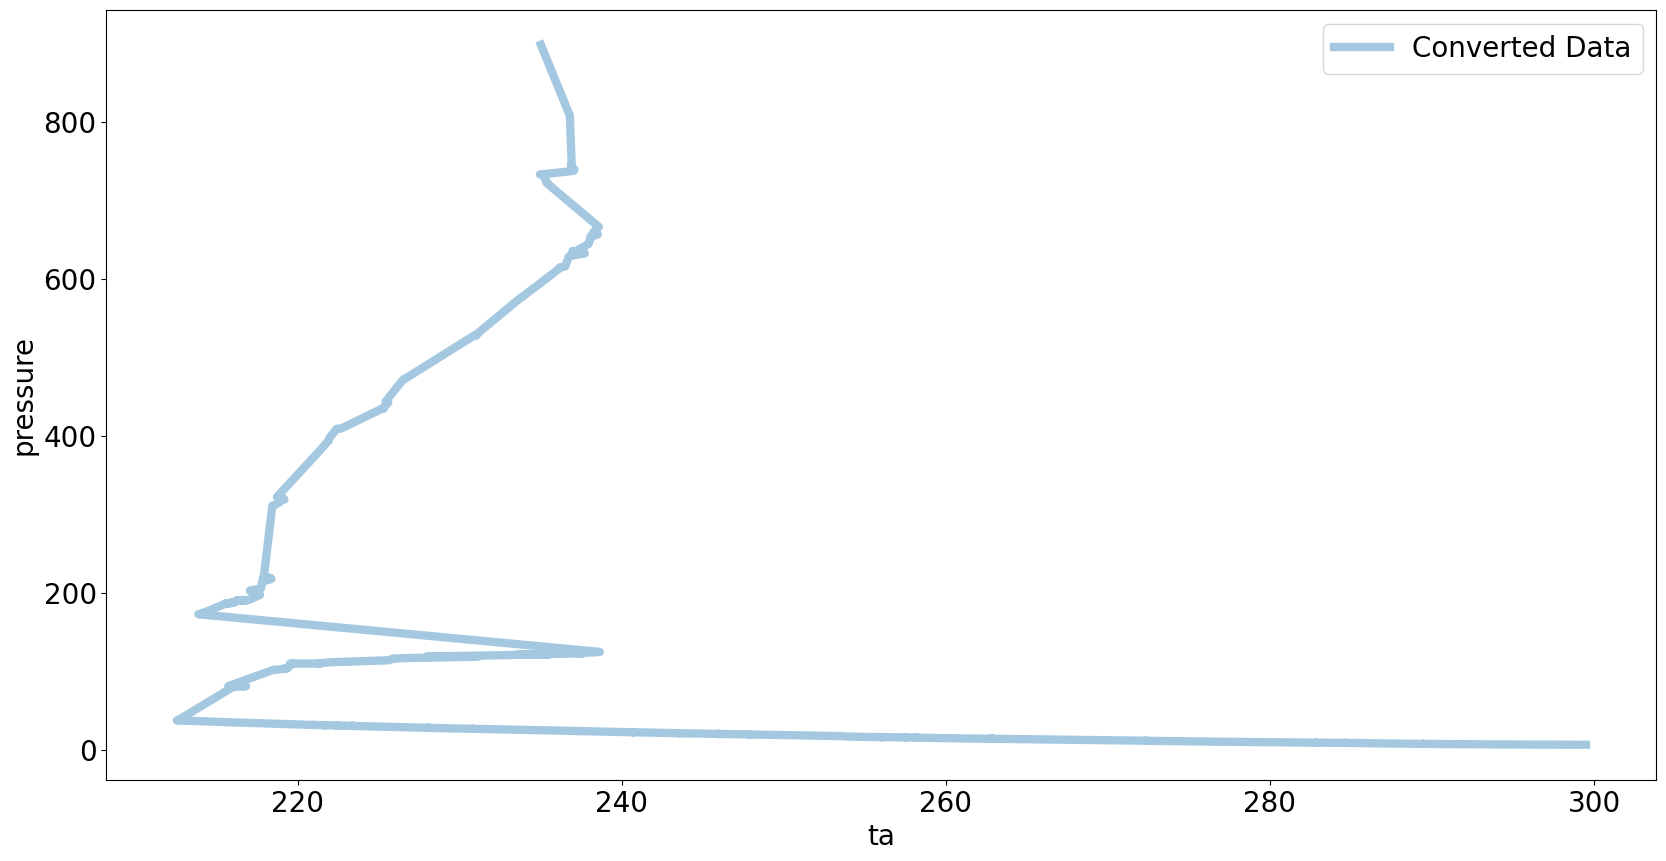

In [30]:
plt.plot(df.Value, df.Pressure, label='Converted Data', alpha = 0.4, linewidth = 6)
ax = plt.gca()
# ax.set_yscale('log')
# ax.set_ylim(ax.get_ylim()[::-1])

# vais_df = pd.read_csv('./vaisala_ascents.csv')
# vais_df = vais_df[vais_df.date_time == "07-02-2005 10:01:53.551"]
# vais_df = vais_df[vais_df.height > 0]
# vais_df.temperature = vais_df.temperature + 273.15
# plt.plot(vais_df.temperature, vais_df.height, label='Preingested Vaisala')#, alpha = 0.4, linewidth = 6)


plt.xlabel("ta")
plt.ylabel("pressure")
plt.legend()
plt.show()

## img to data:

https://github.com/dilawar/PlotDigitizer

https://pypi.org/project/pytesseract/

https://nanonets.com/blog/ocr-with-tesseract/

In [2]:
ingested_data = glob.glob('./interc_2005/*_02_ta.csv')
ingested_data

['./interc_2005/graw_02_ta.csv',
 './interc_2005/sip_02_ta.csv',
 './interc_2005/srs_02_ta.csv',
 './interc_2005/vaisgps_02_ta.csv']

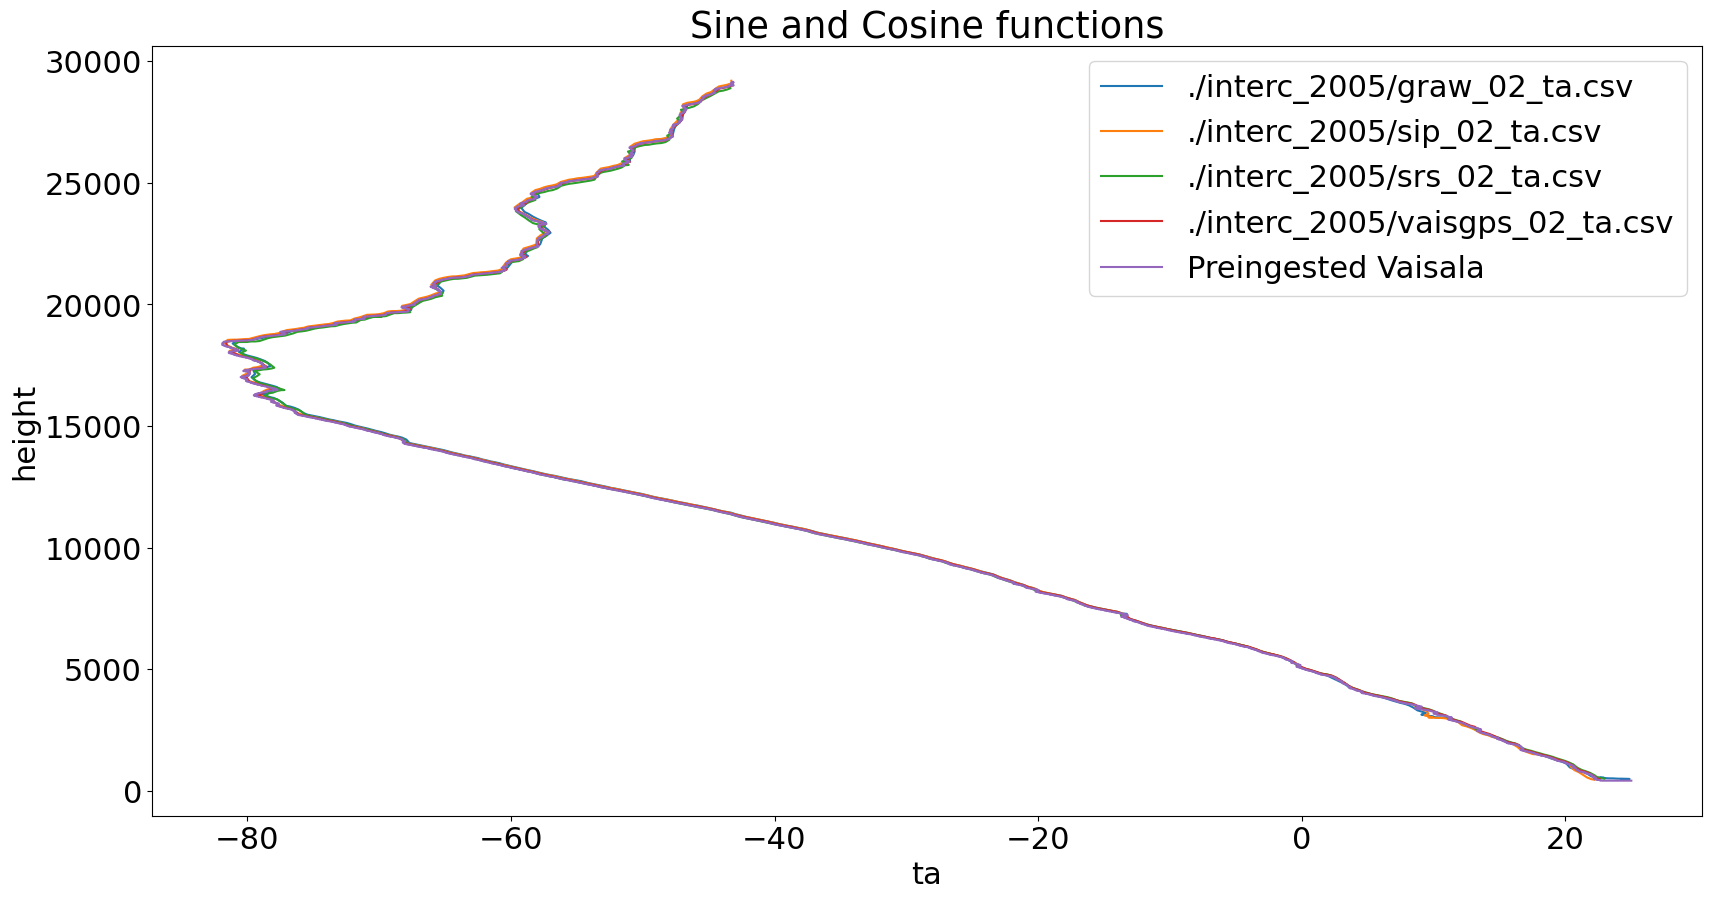

In [28]:
datasets = []
for i in ingested_data:
    df = pd.read_csv(i, delimiter='; ', decimal=',', names=['ta', 'z'])
    # print(i)
    # display(df)
    plt.plot(df.ta, df.z, label=i)
    
vais_df = pd.read_csv('./vaisala_ascents.csv')
vais_df = vais_df[vais_df.date_time == "07-02-2005 14:57:50.481"]
vais_df = vais_df[vais_df.height > 0]
plt.plot(vais_df.temperature, vais_df.height, label='Preingested Vaisala')#, alpha = 0.4, linewidth = 6)
    
plt.xlabel("ta")
plt.ylabel("height")
plt.title("Sine and Cosine functions")
plt.legend()
plt.show()

## target file structure

In [10]:
comp_files = glob.glob("/users/staff/uvoggenberger/scratch/comp/*.nc")
comp_files[0]

'/users/staff/uvoggenberger/scratch/comp/0-20100-0-00201_CEUAS_merged_v0.nc'

In [98]:
for i in comp_files[:3]:
    print(i)
    with eua.CDMDataset(i) as file:
        # display(file)
        # display(file['observations_table'])
        # sensors = np.array(file['observations_table']['sensor_id'][:])
        df = file.to_dataframe(
            groups=["observations_table"],
            variables=["sensor_id", "z_coordinate", "date_time", "observed_variable", "observation_value"],
        )
        display(df)
        print()

/users/staff/uvoggenberger/scratch/comp/0-20100-0-00201_CEUAS_merged_v0.nc


,sensor_id,z_coordinate,date_time,observed_variable,observation_value
0,"FM2,FH_ ,FME",5000.0,1950-05-10 15:29:00,38,NaN
1,"FM2,FH_ ,FME",5300.0,1950-05-10 15:28:00,38,NaN
2,"FM2,FH_ ,FME",5600.0,1950-05-10 15:27:00,38,NaN
3,"FM2,FH_ ,FME",5900.0,1950-05-10 15:26:00,38,NaN
4,"FM2,FH_ ,FME",6200.0,1950-05-10 15:25:00,38,NaN
...,...,...,...,...,...
3157,"FM2,FH_ ,FME",80100.0,1950-05-26 21:12:00,117,NaN
3158,"FM2,FH_ ,FME",84000.0,1950-05-26 21:11:00,117,NaN
3159,"FM2,FH_ ,FME",87700.0,1950-05-26 21:10:00,117,NaN
3160,"FM2,FH_ ,FME",91800.0,1950-05-26 21:09:00,117,NaN



/users/staff/uvoggenberger/scratch/comp/0-20100-0-00202_CEUAS_merged_v0.nc


,sensor_id,z_coordinate,date_time,observed_variable,observation_value
0,S03,25900.0,1950-05-10 14:55:00,38,NaN
1,S03,27500.0,1950-05-10 14:54:00,38,NaN
2,S03,29000.0,1950-05-10 14:53:00,38,NaN
3,S03,30700.0,1950-05-10 14:52:00,38,NaN
4,S03,32500.0,1950-05-10 14:51:00,38,NaN
...,...,...,...,...,...
2830,S03,80500.0,1950-05-26 21:12:00,117,18926.64150
2831,S03,84500.0,1950-05-26 21:11:00,117,15102.08700
2832,S03,88300.0,1950-05-26 21:10:00,117,11571.72900
2833,S03,91900.0,1950-05-26 21:09:00,117,8335.56750



/users/staff/uvoggenberger/scratch/comp/0-20100-0-00203_CEUAS_merged_v0.nc


,sensor_id,z_coordinate,date_time,observed_variable,observation_value
0,"VU_,V_",31700.0,1950-05-10 21:51:00,38,NaN
1,"VU_,V_",33300.0,1950-05-10 21:50:00,38,NaN
2,"VU_,V_",35300.0,1950-05-10 21:49:00,38,NaN
3,"VU_,V_",36900.0,1950-05-10 21:48:00,38,NaN
4,"VU_,V_",39200.0,1950-05-10 21:47:00,38,NaN
...,...,...,...,...,...
2917,"VU_,V_",80100.0,1950-05-26 21:12:00,117,NaN
2918,"VU_,V_",83600.0,1950-05-26 21:11:00,117,NaN
2919,"VU_,V_",87400.0,1950-05-26 21:10:00,117,NaN
2920,"VU_,V_",92600.0,1950-05-26 21:09:00,117,NaN


In [95]:
df

,sensor_id,z_coordinate,date_time,observed_variable,observation_value
0,"FM2,FH_ ,FME",5000.0,1950-05-10 15:29:00,38,NaN
1,"FM2,FH_ ,FME",5300.0,1950-05-10 15:28:00,38,NaN
2,"FM2,FH_ ,FME",5600.0,1950-05-10 15:27:00,38,NaN
3,"FM2,FH_ ,FME",5900.0,1950-05-10 15:26:00,38,NaN
4,"FM2,FH_ ,FME",6200.0,1950-05-10 15:25:00,38,NaN
...,...,...,...,...,...
3157,"FM2,FH_ ,FME",80100.0,1950-05-26 21:12:00,117,NaN
3158,"FM2,FH_ ,FME",84000.0,1950-05-26 21:11:00,117,NaN
3159,"FM2,FH_ ,FME",87700.0,1950-05-26 21:10:00,117,NaN
3160,"FM2,FH_ ,FME",91800.0,1950-05-26 21:09:00,117,NaN


In [93]:
np.unique(sensors, axis=0)

array([[b'F', b'M', b'2', b',', b'F', b'H', b'_', b' ', b',', b'F', b'M',
        b'E', b' ']], dtype='|S1')

## codec to read header

In [31]:
codec = pd.read_csv('./interc_2005/codec.csv')
codec

,Codec,Aliases,Languages
0,ascii,"646, us-ascii",English
1,big5,"big5-tw, csbig5",Traditional Chinese
2,big5hkscs,"big5-hkscs, hkscs",Traditional Chinese
3,cp037,"IBM037, IBM039",English
4,cp273,"273, IBM273, csIBM273",German New in version 3.4.
...,...,...,...
92,utf_16_be,UTF-16BE,all languages
93,utf_16_le,UTF-16LE,all languages
94,utf_7,"U7, unicode-1-1-utf-7",all languages
95,utf_8,"U8, UTF, utf8, cp65001",all languages


## correct meaning of columns?

In [46]:
vais_mau = pd.read_excel("./interc_2005/Mauritius_2005_Vaisala.xlsx")

In [47]:
df = vais_mau.dropna(axis=1, how='all')
df

,Time = 10:01:53.551,Time = 14:57:50.481,Time = 19:31:41.965,Time = 05:13:16.722,Time = 10:00:56.553,Time = 15:03:03.289,Time = 19:33:03.372,Time = 05:12:00.618,Time = 10:05:05.418,Date = 14:59:48.197,...,Time = 18:23:00.860,Time = 05:02:40.940,Time = 10:02:01.112,Time = 15:01:31.734,Time = 05:03:32.669,Time = 10:03:25.750,Time = 15:01:16.195,Time = 18:04:29.389,Time = 05:04:54.828,Time = 10:17:06.975
0,Date = 07-02-2005,Date = 07-02-2005,Date = 07-02-2005,Date = 08-02-2005,Date = 08-02-2005,Date = 08-02-2005,Date = 08-02-2005,Date = 09-02-2005,Date = 09-02-2005,Time = 09-02-2005,...,Date = 22-02-2005,Date = 23-02-2005,Date = 23-02-2005,Date = 23-02-2005,Date = 24-02-2005,Date = 24-02-2005,Date = 24-02-2005,Date = 24-02-2005,Date = 25-02-2005,Date = 25-02-2005
1,0 961.6 28.5 71 425 60 6.2 425,0 962.6 25.0 86 425 85 4.6 425,0 963.5 23.4 96 425 85 4.1 425,0 963.3 24.8 91 425 70 5.0 425,0 962.2 27.0 78 425 60 6.7 425,0 961.6 23.2 94 425 80 5.1 425,0 963.0 23.2 96 425 80 5.1 425,0 963.9 23.9 96 425 60 4.6 425,0 963.4 26.4 79 425 50 4.6 425,0 963.0 23.7 95 425 70 4.1 425,...,0 961.5 23.1 96 425 0 0.0 425,0 961.3 26.9 71 425 200 1.0 425,0 959.5 29.3 65 425 180 2.6 425,0 959.4 25.4 81 425 190 1.5 425,0 961.0 26.6 76 425 180 2.0 425,0 959.8 25.0 91 425 210 2.0 425,0 958.7 24.0 90 425 130 1.0 425,0 961.2 22.7 96 425 0 0.0 425,0 962.1 26.1 77 425 260 1.0 425,0 961.1 28.2 70 425 270 2.6 425
2,1 961.2 26.7 74 428 61 5.1 431,1 962.2 22.9 89 429 73 4.7 423,1 963.0 23.3 96 429 77 3.9 428,1 962.8 23.2 92 430 53 4.9 435,1 961.5 24.0 85 431 43 5.6 432,1 961.3 23.3 95 428 72 4.8 429,1 962.2 22.8 96 432 72 4.4 433,1 963.1 23.7 93 432 58 4.8 430,1 962.2 26.0 81 436 51 4.6 430,1 962.7 23.4 95 428 63 3.8 420,...,1 960.6 23.3 95 433 257 0.6 429,1 960.7 24.9 73 431 172 1.6 432,1 959.1 27.6 61 429 188 3.1 431,1 959.1 24.1 85 427 168 1.6 430,1 959.9 25.8 73 435 183 2.2 430,1 959.2 23.7 89 431 209 1.7 428,1 958.4 23.1 91 428 129 1.5 429,1 960.9 22.8 96 427 95 0.5 426,1 961.4 24.9 67 431 267 0.6 426,1 960.4 26.3 72 431 281 2.4 431
3,2 960.8 25.2 75 433 62 4.8 436,2 961.7 22.8 92 433 65 4.9 425,2 962.5 23.2 97 434 74 4.0 434,2 962.2 23.2 93 435 45 5.1 443,2 960.9 23.9 89 437 34 5.2 438,2 960.9 23.4 96 432 69 5.0 434,2 961.7 22.8 96 437 68 4.1 439,2 962.5 23.6 92 438 56 5.2 435,2 961.5 25.8 81 443 51 4.7 434,2 962.3 23.3 95 431 61 4.0 417,...,2 959.9 23.5 95 440 216 0.9 436,2 960.1 24.8 75 436 162 1.9 439,2 958.8 26.8 60 432 192 3.5 437,2 958.9 24.0 87 430 156 1.8 436,2 959.1 25.7 71 442 184 2.4 435,2 958.6 23.6 88 436 208 1.7 430,2 958.1 23.1 91 430 129 1.8 434,2 960.6 23.0 96 431 145 0.8 427,2 960.8 24.9 68 437 360 0.5 429,2 959.8 26.3 73 437 288 2.3 437
4,3 960.2 25.0 76 437 62 5.0 439,3 961.2 22.7 93 438 61 5.2 429,3 961.9 23.1 97 440 74 4.2 440,3 961.6 23.1 93 440 43 5.5 449,3 960.3 23.8 91 443 31 5.2 445,3 960.3 23.4 96 437 68 5.3 440,3 961.3 22.7 96 441 67 4.3 444,3 961.8 23.5 92 444 55 5.5 439,3 961.0 25.6 81 447 50 4.9 437,3 961.9 23.2 95 435 60 4.3 421,...,3 959.3 23.5 95 445 206 1.1 443,3 959.5 24.8 75 441 160 2.0 445,3 958.5 26.7 60 434 193 3.8 442,3 958.5 24.0 89 433 152 1.9 440,3 958.5 25.6 70 448 184 2.5 440,3 958.2 23.6 88 440 208 1.8 432,3 957.7 23.1 91 434 129 2.0 440,3 960.2 23.3 95 435 159 1.0 430,3 960.2 24.8 69 442 360 0.5 434,3 959.2 26.3 73 442 289 2.3 445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.keys()

Index(['Time = 10:01:53.551', 'Time = 14:57:50.481', 'Time = 19:31:41.965',
       'Time = 05:13:16.722', 'Time = 10:00:56.553', 'Time = 15:03:03.289',
       'Time = 19:33:03.372', 'Time = 05:12:00.618', 'Time = 10:05:05.418',
       'Date = 14:59:48.197', 'Time = 19:17:51.222', 'Time = 05:02:13.432',
       'Time = 09:58:41.940', 'Time = 14:57:54.734', 'Time = 19:00:19.242',
       'Time = 05:02:45.185', 'Time = 15:05:21.407', 'Time = 18:31:58.407',
       'Time = 15:00:05.867', 'Time = 18:36:55.168', 'Time = 05:06:57.494',
       'Time = 10:08:04.684', 'Time = 15:00:54.504', 'Time = 18:00:36.448',
       'Time = 05:16:46.851', 'Time = 10:03:06.727', 'Time = 15:01:34.429',
       'Time = 18:11:25.926', 'Time = 05:11:08.125', 'Time = 10:03:34.821',
       'Time = 10:15:24.825', 'Time = 14:59:11.401', 'Time = 18:03:18.602',
       'Time = 05:13:26.446', 'Time = 10:07:00.508', 'Time = 14:59:17.580',
       'Time = 17:58:42.638', 'Time = 05:06:10.394', 'Time = 15:00:10.825',
       'Time

In [53]:
out = []
for i in df:
    print(i)
    cur_df = df[i].iloc[1:]
    new_df = pd.DataFrame()
    new_df[['number','pressure','temperature','relative_humidity','geopotential','wdir','wspeed','height']] = cur_df.str.split(' ',expand=True)
    new_df = new_df.dropna(axis=0, how='all')
    if df[i].iloc[0].split("Date = ")[0] == "":
        new_df['date_time'] = [df[i].iloc[0].split("Date = ")[-1] + " " + i.split("Time = ")[-1]] * len(new_df)
    else:
        new_df['date_time'] = [df[i].iloc[0].split("Time = ")[-1] + " " + i.split("Date = ")[-1]] * len(new_df)
    display(new_df)
    out.append(new_df)
data = pd.concat(out)
data.to_csv('./vaisala_ascents.csv')


Time = 10:01:53.551


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.6,28.5,71,425,60,6.2,425,07-02-2005 10:01:53.551
2,1,961.2,26.7,74,428,61,5.1,431,07-02-2005 10:01:53.551
3,2,960.8,25.2,75,433,62,4.8,436,07-02-2005 10:01:53.551
4,3,960.2,25.0,76,437,62,5.0,439,07-02-2005 10:01:53.551
5,4,959.6,25.0,77,443,61,5.3,444,07-02-2005 10:01:53.551
...,...,...,...,...,...,...,...,...,...
4584,4583,6.8,-37.7,1,33681,64,23.6,33818,07-02-2005 10:01:53.551
4585,4584,6.7,-37.7,1,33687,64,23.6,33827,07-02-2005 10:01:53.551
4586,4585,6.7,-37.7,1,33695,65,23.6,33835,07-02-2005 10:01:53.551
4587,4586,6.7,-37.8,1,33704,65,23.5,33843,07-02-2005 10:01:53.551


Time = 14:57:50.481


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.6,25.0,86,425,85,4.6,425,07-02-2005 14:57:50.481
2,1,962.2,22.9,89,429,73,4.7,423,07-02-2005 14:57:50.481
3,2,961.7,22.8,92,433,65,4.9,425,07-02-2005 14:57:50.481
4,3,961.2,22.7,93,438,61,5.2,429,07-02-2005 14:57:50.481
5,4,960.5,22.7,94,444,61,5.6,436,07-02-2005 14:57:50.481
...,...,...,...,...,...,...,...,...,...
5072,5071,13.4,-43.2,1,29054,83,25.8,29137,07-02-2005 14:57:50.481
5073,5072,13.4,-43.2,1,29061,83,25.8,29144,07-02-2005 14:57:50.481
5074,5073,13.3,-43.2,1,29067,83,25.9,29151,07-02-2005 14:57:50.481
5075,5074,13.3,-43.2,1,29073,-999,-999.0,-999,07-02-2005 14:57:50.481


Time = 19:31:41.965


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.5,23.4,96,425,85,4.1,425,07-02-2005 19:31:41.965
2,1,963.0,23.3,96,429,77,3.9,428,07-02-2005 19:31:41.965
3,2,962.5,23.2,97,434,74,4.0,434,07-02-2005 19:31:41.965
4,3,961.9,23.1,97,440,74,4.2,440,07-02-2005 19:31:41.965
5,4,961.3,23.1,97,445,75,4.5,446,07-02-2005 19:31:41.965
...,...,...,...,...,...,...,...,...,...
4842,4841,4.8,-30.7,1,36153,81,47.1,36316,07-02-2005 19:31:41.965
4843,4842,4.7,-30.7,1,36160,81,46.9,36325,07-02-2005 19:31:41.965
4844,4843,4.7,-30.8,1,36167,81,46.6,36333,07-02-2005 19:31:41.965
4845,4844,4.7,-30.9,1,36174,81,46.4,36339,07-02-2005 19:31:41.965


Time = 05:13:16.722


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.3,24.8,91,425,70,5.0,425,08-02-2005 05:13:16.722
2,1,962.8,23.2,92,430,53,4.9,435,08-02-2005 05:13:16.722
3,2,962.2,23.2,93,435,45,5.1,443,08-02-2005 05:13:16.722
4,3,961.6,23.1,93,440,43,5.5,449,08-02-2005 05:13:16.722
5,4,961.0,23.1,93,446,43,5.9,454,08-02-2005 05:13:16.722
...,...,...,...,...,...,...,...,...,...
5457,5456,5.6,-31.7,1,35002,71,31.9,35129,08-02-2005 05:13:16.722
5458,5457,5.6,-31.6,1,35010,71,31.8,35135,08-02-2005 05:13:16.722
5459,5458,5.6,-31.5,1,35017,71,31.7,35141,08-02-2005 05:13:16.722
5460,5459,5.6,-31.6,1,35024,71,31.7,35148,08-02-2005 05:13:16.722


Time = 10:00:56.553


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.2,27.0,78,425,60,6.7,425,08-02-2005 10:00:56.553
2,1,961.5,24.0,85,431,43,5.6,432,08-02-2005 10:00:56.553
3,2,960.9,23.9,89,437,34,5.2,438,08-02-2005 10:00:56.553
4,3,960.3,23.8,91,443,31,5.2,445,08-02-2005 10:00:56.553
5,4,959.7,23.8,91,448,31,5.5,453,08-02-2005 10:00:56.553
...,...,...,...,...,...,...,...,...,...
5193,5192,6.2,-36.3,1,34234,92,30.0,34363,08-02-2005 10:00:56.553
5194,5193,6.2,-36.4,1,34242,92,29.9,34371,08-02-2005 10:00:56.553
5195,5194,6.2,-36.5,1,34250,92,29.9,34379,08-02-2005 10:00:56.553
5196,5195,6.2,-36.6,1,34258,92,29.8,34388,08-02-2005 10:00:56.553


Time = 15:03:03.289


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.6,23.2,94,425,80,5.1,425,08-02-2005 15:03:03.289
2,1,961.3,23.3,95,428,72,4.8,429,08-02-2005 15:03:03.289
3,2,960.9,23.4,96,432,69,5.0,434,08-02-2005 15:03:03.289
4,3,960.3,23.4,96,437,68,5.3,440,08-02-2005 15:03:03.289
5,4,959.7,23.4,96,443,68,5.7,445,08-02-2005 15:03:03.289
...,...,...,...,...,...,...,...,...,...
4728,4727,6.1,-36.9,1,34428,101,32.4,34512,08-02-2005 15:03:03.289
4729,4728,6.1,-36.9,1,34436,101,32.4,34520,08-02-2005 15:03:03.289
4730,4729,6.1,-36.9,1,34443,101,32.5,34528,08-02-2005 15:03:03.289
4731,4730,6.0,-36.8,1,34450,101,32.5,34537,08-02-2005 15:03:03.289


Time = 19:33:03.372


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.0,23.2,96,425,80,5.1,425,08-02-2005 19:33:03.372
2,1,962.2,22.8,96,432,72,4.4,433,08-02-2005 19:33:03.372
3,2,961.7,22.8,96,437,68,4.1,439,08-02-2005 19:33:03.372
4,3,961.3,22.7,96,441,67,4.3,444,08-02-2005 19:33:03.372
5,4,960.9,22.7,96,444,67,4.6,448,08-02-2005 19:33:03.372
...,...,...,...,...,...,...,...,...,...
6310,6309,5.2,-31.9,1,35516,78,28.2,35700,08-02-2005 19:33:03.372
6311,6310,5.2,-31.9,1,35520,78,28.1,35702,08-02-2005 19:33:03.372
6312,6311,5.2,-31.9,1,35523,78,28.1,35704,08-02-2005 19:33:03.372
6313,6312,5.2,-31.9,1,35526,78,28.0,35707,08-02-2005 19:33:03.372


Time = 05:12:00.618


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.9,23.9,96,425,60,4.6,425,09-02-2005 05:12:00.618
2,1,963.1,23.7,93,432,58,4.8,430,09-02-2005 05:12:00.618
3,2,962.5,23.6,92,438,56,5.2,435,09-02-2005 05:12:00.618
4,3,961.8,23.5,92,444,55,5.5,439,09-02-2005 05:12:00.618
5,4,961.2,23.5,92,450,55,5.9,444,09-02-2005 05:12:00.618
...,...,...,...,...,...,...,...,...,...
4102,4101,16.0,-47.6,1,27869,87,14.5,27956,09-02-2005 05:12:00.618
4103,4102,16.0,-47.7,1,27876,87,14.5,27962,09-02-2005 05:12:00.618
4104,4103,15.9,-47.7,1,27883,87,14.4,27969,09-02-2005 05:12:00.618
4105,4104,15.9,-47.7,1,27890,87,14.4,27977,09-02-2005 05:12:00.618


Time = 10:05:05.418


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.4,26.4,79,425,50,4.6,425,09-02-2005 10:05:05.418
2,1,962.2,26.0,81,436,51,4.6,430,09-02-2005 10:05:05.418
3,2,961.5,25.8,81,443,51,4.7,434,09-02-2005 10:05:05.418
4,3,961.0,25.6,81,447,50,4.9,437,09-02-2005 10:05:05.418
5,4,960.5,25.5,81,451,50,5.2,441,09-02-2005 10:05:05.418
...,...,...,...,...,...,...,...,...,...
6432,6431,5.5,-29.8,1,35042,101,35.9,35230,09-02-2005 10:05:05.418
6433,6432,5.5,-29.8,1,35045,101,35.9,35233,09-02-2005 10:05:05.418
6434,6433,5.5,-29.8,1,35047,101,35.9,35237,09-02-2005 10:05:05.418
6435,6434,5.5,-29.8,1,35050,101,35.8,35241,09-02-2005 10:05:05.418


Date = 14:59:48.197


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.0,23.7,95,425,70,4.1,425,09-02-2005 14:59:48.197
2,1,962.7,23.4,95,428,63,3.8,420,09-02-2005 14:59:48.197
3,2,962.3,23.3,95,431,61,4.0,417,09-02-2005 14:59:48.197
4,3,961.9,23.2,95,435,60,4.3,421,09-02-2005 14:59:48.197
5,4,961.4,23.2,95,440,60,4.8,429,09-02-2005 14:59:48.197
...,...,...,...,...,...,...,...,...,...
5549,5548,7.3,-34.6,1,33235,83,25.3,33514,09-02-2005 14:59:48.197
5550,5549,7.3,-34.6,1,33243,83,25.3,33520,09-02-2005 14:59:48.197
5551,5550,7.3,-34.6,1,33250,83,25.4,33526,09-02-2005 14:59:48.197
5552,5551,7.2,-34.7,1,33257,83,25.4,33531,09-02-2005 14:59:48.197


Time = 19:17:51.222


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.5,23.3,96,425,65,2.0,425,09-02-2005 19:17:51.222
2,1,964.2,23.0,96,428,58,3.1,434,09-02-2005 19:17:51.222
3,2,963.8,22.8,97,431,54,3.7,442,09-02-2005 19:17:51.222
4,3,963.3,22.7,97,436,53,4.1,448,09-02-2005 19:17:51.222
5,4,962.7,22.7,97,441,52,4.4,455,09-02-2005 19:17:51.222
...,...,...,...,...,...,...,...,...,...
3692,3691,82.0,-77.2,19,17724,-999,-999.0,-999,09-02-2005 19:17:51.222
3693,3692,82.0,-77.2,19,17724,-999,-999.0,-999,09-02-2005 19:17:51.222
3694,3693,82.0,-77.1,19,17724,-999,-999.0,-999,09-02-2005 19:17:51.222
3695,3694,82.0,-77.1,19,17725,-999,-999.0,-999,09-02-2005 19:17:51.222


Time = 05:02:13.432


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.4,24.6,89,425,60,4.1,425,10-02-2005 05:02:13.432
2,1,963.5,24.2,86,433,50,4.1,435,10-02-2005 05:02:13.432
3,2,962.8,23.9,85,439,45,4.2,443,10-02-2005 05:02:13.432
4,3,962.2,23.8,84,445,43,4.4,448,10-02-2005 05:02:13.432
5,4,961.5,23.7,84,451,43,4.7,453,10-02-2005 05:02:13.432
...,...,...,...,...,...,...,...,...,...
5115,5114,6.8,-36.6,1,33670,78,39.6,33777,10-02-2005 05:02:13.432
5116,5115,6.8,-36.6,1,33678,78,39.7,33784,10-02-2005 05:02:13.432
5117,5116,6.7,-36.6,1,33683,78,39.8,33790,10-02-2005 05:02:13.432
5118,5117,6.7,-36.6,1,33688,79,39.8,33797,10-02-2005 05:02:13.432


Time = 09:58:41.940


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.1,28.4,69,425,70,7.0,425,10-02-2005 09:58:41.940
2,1,962.6,24.8,79,429,45,5.1,429,10-02-2005 09:58:41.940
3,2,962.1,24.8,87,434,35,4.5,433,10-02-2005 09:58:41.940
4,3,961.5,24.7,87,440,34,4.7,438,10-02-2005 09:58:41.940
5,4,960.9,24.6,87,445,35,5.1,442,10-02-2005 09:58:41.940
...,...,...,...,...,...,...,...,...,...
5552,5551,5.1,-33.3,1,35719,101,24.2,35845,10-02-2005 09:58:41.940
5553,5552,5.0,-33.2,1,35726,101,24.2,35852,10-02-2005 09:58:41.940
5554,5553,5.0,-33.2,1,35731,101,24.2,35858,10-02-2005 09:58:41.940
5555,5554,5.0,-33.2,1,35736,101,24.3,35863,10-02-2005 09:58:41.940


Time = 14:57:54.734


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.5,23.4,93,425,80,4.1,425,10-02-2005 14:57:54.734
2,1,963.6,22.7,95,433,83,4.1,433,10-02-2005 14:57:54.734
3,2,962.9,22.6,96,440,84,4.2,439,10-02-2005 14:57:54.734
4,3,962.2,22.6,96,446,84,4.6,444,10-02-2005 14:57:54.734
5,4,961.6,22.6,96,451,83,4.9,449,10-02-2005 14:57:54.734
...,...,...,...,...,...,...,...,...,...
7109,7108,4.4,-34.5,1,36768,106,43.7,37089,10-02-2005 14:57:54.734
7110,7109,4.4,-34.5,1,36769,106,43.7,37088,10-02-2005 14:57:54.734
7111,7110,4.4,-34.5,1,36770,106,43.7,37087,10-02-2005 14:57:54.734
7112,7111,4.4,-34.5,1,36771,106,43.6,37086,10-02-2005 14:57:54.734


Time = 19:00:19.242


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,965.4,23.4,94,425,80,4.6,425,10-02-2005 19:00:19.242
2,1,964.7,23.1,97,431,80,4.4,428,10-02-2005 19:00:19.242
3,2,964.1,23.0,98,437,79,4.5,432,10-02-2005 19:00:19.242
4,3,963.5,22.9,99,443,79,4.8,437,10-02-2005 19:00:19.242
5,4,962.9,22.8,99,448,79,5.1,443,10-02-2005 19:00:19.242
...,...,...,...,...,...,...,...,...,...
7194,7193,5.3,-32.9,1,35365,-999,-999.0,-999,10-02-2005 19:00:19.242
7195,7194,5.3,-32.8,1,35367,-999,-999.0,-999,10-02-2005 19:00:19.242
7196,7195,5.3,-32.8,1,35370,-999,-999.0,-999,10-02-2005 19:00:19.242
7197,7196,5.3,-32.8,1,35373,-999,-999.0,-999,10-02-2005 19:00:19.242


Time = 05:02:45.185


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.7,24.8,88,425,70,5.1,425,11-02-2005 05:02:45.185
2,1,963.2,23.5,87,430,65,4.5,429,11-02-2005 05:02:45.185
3,2,962.6,23.4,87,435,63,4.5,434,11-02-2005 05:02:45.185
4,3,961.9,23.4,88,441,62,4.8,440,11-02-2005 05:02:45.185
5,4,961.2,23.3,88,448,62,5.2,446,11-02-2005 05:02:45.185
...,...,...,...,...,...,...,...,...,...
5667,5666,4.9,-31.5,1,35932,85,42.1,36096,11-02-2005 05:02:45.185
5668,5667,4.9,-31.5,1,35937,85,42.1,36101,11-02-2005 05:02:45.185
5669,5668,4.9,-31.5,1,35942,86,42.1,36106,11-02-2005 05:02:45.185
5670,5669,4.9,-31.5,1,35946,86,42.0,36110,11-02-2005 05:02:45.185


Time = 15:05:21.407


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.9,22.8,95,425,70,3.6,425,11-02-2005 15:05:21.407
2,1,963.2,22.4,97,432,57,3.3,425,11-02-2005 15:05:21.407
3,2,962.5,22.2,98,438,52,3.4,428,11-02-2005 15:05:21.407
4,3,961.9,22.2,98,443,50,3.6,433,11-02-2005 15:05:21.407
5,4,961.3,22.1,98,448,50,4.0,439,11-02-2005 15:05:21.407
...,...,...,...,...,...,...,...,...,...
5517,5516,62.4,-72.1,15,19340,85,3.5,19349,11-02-2005 15:05:21.407
5518,5517,62.3,-72.1,15,19342,84,3.4,19351,11-02-2005 15:05:21.407
5519,5518,62.3,-72.1,15,19344,84,3.4,19352,11-02-2005 15:05:21.407
5520,5519,62.3,-72.1,15,19347,84,3.3,19353,11-02-2005 15:05:21.407


Time = 18:31:58.407


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.5,22.8,96,425,80,4.1,425,11-02-2005 18:31:58.407
2,1,963.6,22.5,96,433,79,5.2,428,11-02-2005 18:31:58.407
3,2,962.9,22.4,96,440,79,5.9,431,11-02-2005 18:31:58.407
4,3,962.3,22.3,96,445,78,6.4,434,11-02-2005 18:31:58.407
5,4,961.7,22.3,96,451,78,6.8,437,11-02-2005 18:31:58.407
...,...,...,...,...,...,...,...,...,...
1491,1490,270.8,-35.1,61,10454,2,8.5,10443,11-02-2005 18:31:58.407
1492,1491,270.5,-35.1,60,10461,3,8.5,10451,11-02-2005 18:31:58.407
1493,1492,270.2,-35.2,60,10469,3,8.5,10458,11-02-2005 18:31:58.407
1494,1493,269.9,-35.3,60,10477,3,8.5,10465,11-02-2005 18:31:58.407


Time = 15:00:05.867


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,959.8,24.1,92,425,90,1.5,425,12-02-2005 15:00:05.867
2,1,959.4,23.2,94,429,94,2.2,427,12-02-2005 15:00:05.867
3,2,958.9,23.1,95,434,96,2.7,431,12-02-2005 15:00:05.867
4,3,958.4,23.1,96,438,97,3.0,435,12-02-2005 15:00:05.867
5,4,957.9,23.0,96,443,97,3.2,440,12-02-2005 15:00:05.867
...,...,...,...,...,...,...,...,...,...
6415,6414,4.5,-33.0,1,36572,101,40.2,36750,12-02-2005 15:00:05.867
6416,6415,4.5,-32.9,1,36578,101,40.1,36755,12-02-2005 15:00:05.867
6417,6416,4.5,-32.9,1,36582,101,40.0,36759,12-02-2005 15:00:05.867
6418,6417,4.5,-32.8,1,36585,101,39.8,36763,12-02-2005 15:00:05.867


Time = 18:36:55.168


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,960.1,22.9,95,425,0,0.0,425,12-02-2005 18:36:55.168
2,1,959.4,22.9,95,431,78,1.9,430,12-02-2005 18:36:55.168
3,2,958.8,22.9,95,437,125,3.1,435,12-02-2005 18:36:55.168
4,3,958.3,22.9,95,442,141,3.8,440,12-02-2005 18:36:55.168
5,4,957.7,22.9,95,447,142,4.1,444,12-02-2005 18:36:55.168
...,...,...,...,...,...,...,...,...,...
5966,5965,7.7,-39.6,1,32817,-999,-999.0,-999,12-02-2005 18:36:55.168
5967,5966,7.7,-39.6,1,32822,-999,-999.0,-999,12-02-2005 18:36:55.168
5968,5967,7.7,-39.6,1,32827,-999,-999.0,-999,12-02-2005 18:36:55.168
5969,5968,7.7,-39.5,1,32833,-999,-999.0,-999,12-02-2005 18:36:55.168


Time = 05:06:57.494


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,958.1,24.9,96,425,300,1.5,425,14-02-2005 05:06:57.494
2,1,957.4,24.6,96,431,300,2.3,430,14-02-2005 05:06:57.494
3,2,956.8,24.4,96,437,300,2.8,436,14-02-2005 05:06:57.494
4,3,956.1,24.3,96,443,301,3.0,443,14-02-2005 05:06:57.494
5,4,955.5,24.2,96,449,301,3.2,451,14-02-2005 05:06:57.494
...,...,...,...,...,...,...,...,...,...
5531,5530,4.6,-27.9,1,36366,91,35.5,36573,14-02-2005 05:06:57.494
5532,5531,4.6,-27.8,1,36372,91,35.4,36579,14-02-2005 05:06:57.494
5533,5532,4.6,-27.8,1,36377,91,35.3,36585,14-02-2005 05:06:57.494
5534,5533,4.6,-27.8,1,36384,91,35.3,36591,14-02-2005 05:06:57.494


Time = 10:08:04.684


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,958.2,26.3,96,425,310,4.6,425,14-02-2005 10:08:04.684
2,1,957.4,24.2,98,433,280,3.9,429,14-02-2005 10:08:04.684
3,2,956.7,24.1,98,439,267,3.7,434,14-02-2005 10:08:04.684
4,3,956.1,24.0,99,444,265,3.9,439,14-02-2005 10:08:04.684
5,4,955.6,23.9,99,449,267,4.3,444,14-02-2005 10:08:04.684
...,...,...,...,...,...,...,...,...,...
6557,6556,6.2,-33.6,1,34311,77,34.6,34435,14-02-2005 10:08:04.684
6558,6557,6.2,-33.7,1,34318,77,34.6,34441,14-02-2005 10:08:04.684
6559,6558,6.2,-33.8,1,34325,77,34.6,34447,14-02-2005 10:08:04.684
6560,6559,6.2,-33.8,1,34330,77,34.6,34453,14-02-2005 10:08:04.684


Time = 15:00:54.504


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,959.8,24.7,97,425,330,3.1,425,14-02-2005 15:00:54.504
2,1,959.4,24.5,98,428,337,3.7,428,14-02-2005 15:00:54.504
3,2,959.0,24.5,99,432,341,4.1,432,14-02-2005 15:00:54.504
4,3,958.6,24.4,99,436,342,4.5,437,14-02-2005 15:00:54.504
5,4,958.2,24.4,99,440,342,4.9,441,14-02-2005 15:00:54.504
...,...,...,...,...,...,...,...,...,...
7743,7742,5.0,-34.2,1,35825,105,49.5,35925,14-02-2005 15:00:54.504
7744,7743,5.0,-34.2,1,35826,105,49.5,35925,14-02-2005 15:00:54.504
7745,7744,5.0,-34.1,1,35826,105,49.5,35926,14-02-2005 15:00:54.504
7746,7745,5.0,-34.1,1,35827,105,49.5,35926,14-02-2005 15:00:54.504


Time = 18:00:36.448


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.0,24.3,96,425,360,5.7,425,14-02-2005 18:00:36.448
2,1,960.4,24.2,98,430,5,5.2,427,14-02-2005 18:00:36.448
3,2,960.0,24.1,98,435,7,5.1,430,14-02-2005 18:00:36.448
4,3,959.5,24.1,98,439,7,5.4,434,14-02-2005 18:00:36.448
5,4,959.1,24.1,99,443,6,5.9,439,14-02-2005 18:00:36.448
...,...,...,...,...,...,...,...,...,...
3047,3046,67.4,-74.7,45,18884,105,3.0,18893,14-02-2005 18:00:36.448
3048,3047,67.3,-74.8,45,18890,105,3.0,18898,14-02-2005 18:00:36.448
3049,3048,67.3,-74.8,45,18896,105,3.0,18904,14-02-2005 18:00:36.448
3050,3049,67.2,-74.9,45,18902,-999,-999.0,-999,14-02-2005 18:00:36.448


Time = 05:16:46.851


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.4,25.4,89,425,10,5.1,425,15-02-2005 05:16:46.851
2,1,962.2,24.3,93,427,20,4.1,427,15-02-2005 05:16:46.851
3,2,962.1,24.2,95,428,24,3.9,431,15-02-2005 05:16:46.851
4,3,961.9,24.2,96,430,24,4.2,435,15-02-2005 05:16:46.851
5,4,961.7,24.1,96,432,22,4.6,438,15-02-2005 05:16:46.851
...,...,...,...,...,...,...,...,...,...
7599,7598,5.4,-26.2,1,35324,76,28.1,35523,15-02-2005 05:16:46.851
7600,7599,5.4,-26.2,1,35326,76,28.1,35524,15-02-2005 05:16:46.851
7601,7600,5.4,-26.2,1,35328,76,28.1,35527,15-02-2005 05:16:46.851
7602,7601,5.4,-26.2,1,35330,76,28.1,35529,15-02-2005 05:16:46.851


Time = 10:03:06.727


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.1,25.3,93,425,20,4.1,425,15-02-2005 10:03:06.727
2,1,961.4,25.3,89,431,18,4.9,424,15-02-2005 10:03:06.727
3,2,960.8,25.3,87,437,17,5.5,428,15-02-2005 10:03:06.727
4,3,960.1,25.2,86,443,17,6.0,434,15-02-2005 10:03:06.727
5,4,959.5,25.1,85,449,18,6.4,441,15-02-2005 10:03:06.727
...,...,...,...,...,...,...,...,...,...
6489,6488,4.7,-26.5,1,36162,103,31.9,36309,15-02-2005 10:03:06.727
6490,6489,4.7,-26.5,1,36165,103,31.8,36311,15-02-2005 10:03:06.727
6491,6490,4.7,-26.5,1,36168,103,31.8,36313,15-02-2005 10:03:06.727
6492,6491,4.7,-26.4,1,36170,103,31.8,36315,15-02-2005 10:03:06.727


Time = 15:01:34.429


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.5,24.4,93,425,50,4.6,425,15-02-2005 15:01:34.429
2,1,961.9,24.1,96,431,39,4.3,428,15-02-2005 15:01:34.429
3,2,961.3,23.9,97,436,35,4.4,432,15-02-2005 15:01:34.429
4,3,960.8,23.8,97,441,34,4.7,437,15-02-2005 15:01:34.429
5,4,960.2,23.7,97,446,35,5.1,444,15-02-2005 15:01:34.429
...,...,...,...,...,...,...,...,...,...
3601,3600,49.8,-63.1,5,20670,93,13.6,20676,15-02-2005 15:01:34.429
3602,3601,49.7,-63.1,5,20674,93,13.5,20682,15-02-2005 15:01:34.429
3603,3602,49.7,-63.1,5,20679,93,13.5,20688,15-02-2005 15:01:34.429
3604,3603,49.7,-63.1,4,20683,93,13.5,20694,15-02-2005 15:01:34.429


Time = 18:11:25.926


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.5,23.1,96,425,50,4.6,425,15-02-2005 18:11:25.926
2,1,964.0,23.5,98,430,37,4.9,428,15-02-2005 18:11:25.926
3,2,963.5,23.7,98,434,29,5.2,431,15-02-2005 18:11:25.926
4,3,963.2,23.7,97,437,27,5.5,435,15-02-2005 18:11:25.926
5,4,962.8,23.8,96,440,27,5.9,439,15-02-2005 18:11:25.926
...,...,...,...,...,...,...,...,...,...
5462,5461,63.3,-73.3,10,19245,137,4.6,19244,15-02-2005 18:11:25.926
5463,5462,63.3,-73.3,10,19247,136,4.6,19246,15-02-2005 18:11:25.926
5464,5463,63.3,-73.4,10,19249,136,4.6,19248,15-02-2005 18:11:25.926
5465,5464,63.3,-73.4,10,19251,-999,-999.0,-999,15-02-2005 18:11:25.926


Time = 05:11:08.125


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.7,24.5,92,425,50,7.0,425,16-02-2005 05:11:08.125
2,1,963.9,24.1,92,433,33,5.8,433,16-02-2005 05:11:08.125
3,2,963.1,23.9,91,439,26,5.6,439,16-02-2005 05:11:08.125
4,3,962.5,23.8,91,446,25,5.9,446,16-02-2005 05:11:08.125
5,4,961.8,23.7,92,452,26,6.4,453,16-02-2005 05:11:08.125
...,...,...,...,...,...,...,...,...,...
5220,5219,5.0,-32.5,1,35845,90,30.4,35770,16-02-2005 05:11:08.125
5221,5220,5.0,-32.6,1,35865,90,30.5,35777,16-02-2005 05:11:08.125
5222,5221,4.9,-32.6,1,35883,90,30.6,35785,16-02-2005 05:11:08.125
5223,5222,4.9,-32.6,1,35898,89,30.7,35794,16-02-2005 05:11:08.125


Time = 10:03:34.821


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.0,24.1,96,425,60,3.6,425,16-02-2005 10:03:34.821
2,1,963.2,24.2,91,432,50,4.3,428,16-02-2005 10:03:34.821
3,2,962.7,24.2,88,437,43,4.8,432,16-02-2005 10:03:34.821
4,3,962.2,24.2,86,441,40,5.2,435,16-02-2005 10:03:34.821
5,4,961.8,24.2,86,445,40,5.4,439,16-02-2005 10:03:34.821
...,...,...,...,...,...,...,...,...,...
6799,6798,5.4,-29.6,1,35267,90,28.2,35419,16-02-2005 10:03:34.821
6800,6799,5.4,-29.6,1,35270,90,28.1,35423,16-02-2005 10:03:34.821
6801,6800,5.4,-29.6,1,35273,90,28.1,35427,16-02-2005 10:03:34.821
6802,6801,5.4,-29.6,1,35277,90,28.0,35430,16-02-2005 10:03:34.821


Time = 10:15:24.825


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.9,25.2,89,425,50,4.1,425,17-02-2005 10:15:24.825
2,1,962.1,25.1,79,433,42,3.8,429,17-02-2005 10:15:24.825
3,2,961.4,25.0,77,439,37,3.7,433,17-02-2005 10:15:24.825
4,3,960.8,24.9,78,444,35,3.9,439,17-02-2005 10:15:24.825
5,4,960.3,24.8,78,449,35,4.1,444,17-02-2005 10:15:24.825
...,...,...,...,...,...,...,...,...,...
5094,5093,8.0,-39.1,1,32530,83,27.7,32624,17-02-2005 10:15:24.825
5095,5094,8.0,-39.1,1,32537,83,27.7,32632,17-02-2005 10:15:24.825
5096,5095,8.0,-39.1,1,32543,82,27.7,32640,17-02-2005 10:15:24.825
5097,5096,7.9,-39.2,1,32550,82,27.7,32646,17-02-2005 10:15:24.825


Time = 14:59:11.401


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.9,24.1,95,425,70,4.0,425,17-02-2005 14:59:11.401
2,1,962.1,23.2,97,432,58,3.8,426,17-02-2005 14:59:11.401
3,2,961.5,23.2,98,437,50,3.9,429,17-02-2005 14:59:11.401
4,3,961.0,23.2,99,442,48,4.1,434,17-02-2005 14:59:11.401
5,4,960.5,23.2,99,447,47,4.3,439,17-02-2005 14:59:11.401
...,...,...,...,...,...,...,...,...,...
4594,4593,14.9,-46.0,1,28338,95,24.7,28459,17-02-2005 14:59:11.401
4595,4594,14.9,-46.0,1,28344,95,24.7,28465,17-02-2005 14:59:11.401
4596,4595,14.9,-46.0,1,28351,95,24.7,28471,17-02-2005 14:59:11.401
4597,4596,14.8,-46.0,1,28357,-999,-999.0,-999,17-02-2005 14:59:11.401


Time = 18:03:18.602


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,964.0,23.7,95,425,70,5.9,425,17-02-2005 18:03:18.602
2,1,963.3,23.4,96,432,51,3.9,431,17-02-2005 18:03:18.602
3,2,962.6,23.3,96,437,45,3.3,435,17-02-2005 18:03:18.602
4,3,962.1,23.2,97,442,44,3.4,439,17-02-2005 18:03:18.602
5,4,961.6,23.2,97,447,44,3.8,445,17-02-2005 18:03:18.602
...,...,...,...,...,...,...,...,...,...
6741,6740,7.8,-37.7,1,32680,-999,-999.0,-999,17-02-2005 18:03:18.602
6742,6741,7.8,-37.7,1,32684,-999,-999.0,-999,17-02-2005 18:03:18.602
6743,6742,7.8,-37.7,1,32689,-999,-999.0,-999,17-02-2005 18:03:18.602
6744,6743,7.8,-37.7,1,32693,-999,-999.0,-999,17-02-2005 18:03:18.602


Time = 05:13:26.446


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.1,24.6,92,425,60,4.1,425,18-02-2005 05:13:26.446
2,1,962.6,24.6,89,430,42,3.3,433,18-02-2005 05:13:26.446
3,2,962.0,24.6,87,435,32,2.9,440,18-02-2005 05:13:26.446
4,3,961.4,24.6,86,440,29,2.9,447,18-02-2005 05:13:26.446
5,4,960.8,24.5,86,446,30,3.1,454,18-02-2005 05:13:26.446
...,...,...,...,...,...,...,...,...,...
6090,6089,4.4,-27.3,1,36726,99,28.6,36565,18-02-2005 05:13:26.446
6091,6090,4.4,-27.1,1,36733,99,28.7,36571,18-02-2005 05:13:26.446
6092,6091,4.4,-27.1,1,36739,99,28.8,36578,18-02-2005 05:13:26.446
6093,6092,4.4,-27.0,1,36745,99,28.9,36584,18-02-2005 05:13:26.446


Time = 10:07:00.508


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.9,26.6,82,425,360,3.6,425,18-02-2005 10:07:00.508
2,1,961.6,25.3,79,437,11,3.5,432,18-02-2005 10:07:00.508
3,2,960.7,25.2,78,445,19,3.5,439,18-02-2005 10:07:00.508
4,3,960.1,25.2,78,451,22,3.6,445,18-02-2005 10:07:00.508
5,4,959.6,25.1,79,455,22,3.8,450,18-02-2005 10:07:00.508
...,...,...,...,...,...,...,...,...,...
6105,6104,13.4,-45.7,1,29068,102,22.0,29092,18-02-2005 10:07:00.508
6106,6105,13.3,-45.7,1,29072,102,22.0,29096,18-02-2005 10:07:00.508
6107,6106,13.3,-45.7,1,29075,102,22.0,29100,18-02-2005 10:07:00.508
6108,6107,13.3,-45.8,1,29078,102,22.0,29104,18-02-2005 10:07:00.508


Time = 14:59:17.580


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.2,24.4,91,425,80,1.5,425,18-02-2005 14:59:17.580
2,1,962.5,23.6,93,431,58,1.8,430,18-02-2005 14:59:17.580
3,2,962.0,23.7,93,436,44,2.1,435,18-02-2005 14:59:17.580
4,3,961.5,23.6,94,440,39,2.3,441,18-02-2005 14:59:17.580
5,4,961.0,23.6,94,445,39,2.5,445,18-02-2005 14:59:17.580
...,...,...,...,...,...,...,...,...,...
7761,7760,7.9,-43.3,1,32639,88,23.9,32722,18-02-2005 14:59:17.580
7762,7761,7.9,-43.3,1,32640,88,23.9,32722,18-02-2005 14:59:17.580
7763,7762,7.9,-43.3,1,32641,88,23.9,32723,18-02-2005 14:59:17.580
7764,7763,7.9,-43.4,1,32642,88,23.9,32724,18-02-2005 14:59:17.580


Time = 17:58:42.638


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,965.4,23.9,94,425,90,1.5,425,18-02-2005 17:58:42.638
2,1,964.7,23.6,95,431,59,1.7,432,18-02-2005 17:58:42.638
3,2,964.0,23.5,96,438,41,1.8,438,18-02-2005 17:58:42.638
4,3,963.3,23.4,96,444,35,2.0,443,18-02-2005 17:58:42.638
5,4,962.6,23.4,96,451,34,2.1,449,18-02-2005 17:58:42.638
...,...,...,...,...,...,...,...,...,...
2504,2503,82.7,-76.9,33,17719,152,5.3,17727,18-02-2005 17:58:42.638
2505,2504,82.6,-76.9,33,17727,152,5.4,17735,18-02-2005 17:58:42.638
2506,2505,82.4,-76.9,33,17736,152,5.5,17743,18-02-2005 17:58:42.638
2507,2506,82.3,-76.8,33,17743,-999,-999.0,-999,18-02-2005 17:58:42.638


Time = 05:06:10.394


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.7,26.8,79,425,60,1.0,425,19-02-2005 05:06:10.394
2,1,963.1,25.8,75,430,42,1.1,429,19-02-2005 05:06:10.394
3,2,962.6,25.6,73,435,35,1.1,434,19-02-2005 05:06:10.394
4,3,962.2,25.5,73,439,33,1.2,440,19-02-2005 05:06:10.394
5,4,961.7,25.5,73,443,34,1.3,446,19-02-2005 05:06:10.394
...,...,...,...,...,...,...,...,...,...
2522,2521,174.9,-60.0,40,13337,247,15.5,13349,19-02-2005 05:06:10.394
2523,2522,174.8,-60.1,39,13343,247,15.4,13355,19-02-2005 05:06:10.394
2524,2523,174.6,-60.1,39,13349,247,15.4,13361,19-02-2005 05:06:10.394
2525,2524,174.4,-60.2,39,13354,247,15.4,13367,19-02-2005 05:06:10.394


Time = 15:00:10.825


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.5,23.8,97,425,0,0.0,425,19-02-2005 15:00:10.825
2,1,962.2,23.5,97,428,103,0.9,427,19-02-2005 15:00:10.825
3,2,961.9,23.3,97,430,164,1.5,430,19-02-2005 15:00:10.825
4,3,961.6,23.3,97,433,183,1.7,436,19-02-2005 15:00:10.825
5,4,961.1,23.3,96,438,183,1.8,442,19-02-2005 15:00:10.825
...,...,...,...,...,...,...,...,...,...
7017,7016,4.6,-29.5,1,36416,101,42.8,36327,19-02-2005 15:00:10.825
7018,7017,4.6,-29.5,1,36419,101,42.8,36330,19-02-2005 15:00:10.825
7019,7018,4.6,-29.4,1,36423,101,42.8,36332,19-02-2005 15:00:10.825
7020,7019,4.5,-29.4,1,36427,101,42.8,36334,19-02-2005 15:00:10.825


Time = 18:13:08.575


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,963.3,22.7,97,425,0,0.0,425,19-02-2005 18:13:08.575
2,1,963.1,22.5,100,427,118,1.1,432,19-02-2005 18:13:08.575
3,2,962.8,22.5,100,429,173,1.6,438,19-02-2005 18:13:08.575
4,3,962.6,22.7,100,432,184,1.8,442,19-02-2005 18:13:08.575
5,4,962.2,23.1,99,435,179,1.8,446,19-02-2005 18:13:08.575
...,...,...,...,...,...,...,...,...,...
6101,6100,7.2,-34.1,1,33166,96,38.0,33340,19-02-2005 18:13:08.575
6102,6101,7.2,-34.1,1,33171,-999,-999.0,-999,19-02-2005 18:13:08.575
6103,6102,7.2,-33.9,1,33175,-999,-999.0,-999,19-02-2005 18:13:08.575
6104,6103,7.2,-33.8,1,33180,-999,-999.0,-999,19-02-2005 18:13:08.575


Time = 05:02:39.760


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.1,25.2,75,425,150,3.4,425,21-02-2005 05:02:39.760
2,1,960.8,22.9,87,428,151,2.4,433,21-02-2005 05:02:39.760
3,2,960.4,22.9,88,432,152,1.9,439,21-02-2005 05:02:39.760
4,3,959.9,22.8,89,436,152,1.9,444,21-02-2005 05:02:39.760
5,4,959.4,22.8,89,441,153,2.1,448,21-02-2005 05:02:39.760
...,...,...,...,...,...,...,...,...,...
6654,6653,8.4,-38.5,1,32236,87,32.1,32333,21-02-2005 05:02:39.760
6655,6654,8.4,-38.6,1,32240,87,32.1,32338,21-02-2005 05:02:39.760
6656,6655,8.4,-38.6,1,32245,87,32.2,32343,21-02-2005 05:02:39.760
6657,6656,8.4,-38.6,1,32249,87,32.2,32348,21-02-2005 05:02:39.760


Time = 10:00:42.344


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.1,27.6,61,425,140,3.0,425,21-02-2005 10:00:42.344
2,1,959.7,25.1,64,438,149,2.8,430,21-02-2005 10:00:42.344
3,2,958.7,25.3,66,447,153,2.7,434,21-02-2005 10:00:42.344
4,3,958.1,25.3,67,453,154,2.8,439,21-02-2005 10:00:42.344
5,4,957.6,25.2,68,457,153,2.9,442,21-02-2005 10:00:42.344
...,...,...,...,...,...,...,...,...,...
6783,6782,8.1,-32.2,1,32415,89,34.2,32534,21-02-2005 10:00:42.344
6784,6783,8.1,-32.1,1,32417,89,34.2,32537,21-02-2005 10:00:42.344
6785,6784,8.1,-32.1,1,32420,89,34.2,32539,21-02-2005 10:00:42.344
6786,6785,8.1,-32.1,1,32422,89,34.2,32542,21-02-2005 10:00:42.344


Time = 15:50:20.797


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,960.6,23.6,85,425,185,3.0,425,21-02-2005 15:50:20.797
2,1,960.2,23.0,87,429,188,3.2,428,21-02-2005 15:50:20.797
3,2,959.7,22.9,88,433,190,3.5,431,21-02-2005 15:50:20.797
4,3,959.2,22.9,88,438,190,3.7,436,21-02-2005 15:50:20.797
5,4,958.7,22.8,88,443,190,4.0,442,21-02-2005 15:50:20.797
...,...,...,...,...,...,...,...,...,...
5859,5858,6.4,-36.9,1,34115,92,30.8,34100,21-02-2005 15:50:20.797
5860,5859,6.4,-36.9,1,34122,92,30.9,34107,21-02-2005 15:50:20.797
5861,5860,6.4,-36.9,1,34131,91,31.0,34113,21-02-2005 15:50:20.797
5862,5861,6.4,-36.9,1,34140,-999,-999.0,-999,21-02-2005 15:50:20.797


Time = 05:09:02.375


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,960.5,24.5,90,425,240,1.5,425,22-02-2005 05:09:02.375
2,1,959.9,24.3,89,431,231,1.7,428,22-02-2005 05:09:02.375
3,2,959.2,24.2,87,437,222,1.8,431,22-02-2005 05:09:02.375
4,3,958.6,24.1,86,442,215,2.0,434,22-02-2005 05:09:02.375
5,4,958.0,24.0,84,448,209,2.1,439,22-02-2005 05:09:02.375
...,...,...,...,...,...,...,...,...,...
5532,5531,6.3,-31.8,1,34227,78,32.2,34399,22-02-2005 05:09:02.375
5533,5532,6.3,-31.8,1,34232,78,32.3,34408,22-02-2005 05:09:02.375
5534,5533,6.3,-31.9,1,34238,78,32.4,34416,22-02-2005 05:09:02.375
5535,5534,6.3,-31.9,1,34244,78,32.5,34424,22-02-2005 05:09:02.375


Time = 10:01:54.537


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,958.9,28.5,71,425,250,3.1,425,22-02-2005 10:01:54.537
2,1,958.2,26.0,73,432,225,2.6,434,22-02-2005 10:01:54.537
3,2,957.6,25.9,74,437,215,2.5,440,22-02-2005 10:01:54.537
4,3,957.2,25.9,75,441,212,2.6,444,22-02-2005 10:01:54.537
5,4,956.8,25.9,75,444,212,2.7,448,22-02-2005 10:01:54.537
...,...,...,...,...,...,...,...,...,...
7101,7100,5.7,-40.8,1,34857,83,31.6,34951,22-02-2005 10:01:54.537
7102,7101,5.7,-40.8,1,34860,83,31.6,34954,22-02-2005 10:01:54.537
7103,7102,5.7,-40.4,1,34863,83,31.6,34958,22-02-2005 10:01:54.537
7104,7103,5.7,-40.0,1,34866,83,31.6,34963,22-02-2005 10:01:54.537


Time = 15:01:57.112


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,959.8,25.1,85,425,210,2.0,425,22-02-2005 15:01:57.112
2,1,959.4,23.9,89,429,195,1.6,424,22-02-2005 15:01:57.112
3,2,959.0,23.9,90,433,189,1.5,427,22-02-2005 15:01:57.112
4,3,958.6,23.9,91,436,188,1.6,431,22-02-2005 15:01:57.112
5,4,958.3,23.9,91,439,189,1.8,435,22-02-2005 15:01:57.112
...,...,...,...,...,...,...,...,...,...
9311,9310,6.8,-40.2,1,33622,90,34.1,33680,22-02-2005 15:01:57.112
9312,9311,6.8,-40.2,1,33623,90,34.1,33681,22-02-2005 15:01:57.112
9313,9312,6.8,-40.2,1,33623,90,34.1,33681,22-02-2005 15:01:57.112
9314,9313,6.8,-40.2,1,33624,90,34.1,33681,22-02-2005 15:01:57.112


Time = 18:23:00.860


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.5,23.1,96,425,0,0.0,425,22-02-2005 18:23:00.860
2,1,960.6,23.3,95,433,257,0.6,429,22-02-2005 18:23:00.860
3,2,959.9,23.5,95,440,216,0.9,436,22-02-2005 18:23:00.860
4,3,959.3,23.5,95,445,206,1.1,443,22-02-2005 18:23:00.860
5,4,958.7,23.4,94,450,206,1.2,449,22-02-2005 18:23:00.860
...,...,...,...,...,...,...,...,...,...
6501,6500,4.7,-32.5,1,36192,99,39.7,36144,22-02-2005 18:23:00.860
6502,6501,4.7,-32.5,1,36195,100,39.7,36148,22-02-2005 18:23:00.860
6503,6502,4.7,-32.4,1,36198,100,39.7,36152,22-02-2005 18:23:00.860
6504,6503,4.7,-32.3,1,36201,100,39.7,36157,22-02-2005 18:23:00.860


Time = 05:02:40.940


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.3,26.9,71,425,200,1.0,425,23-02-2005 05:02:40.940
2,1,960.7,24.9,73,431,172,1.6,432,23-02-2005 05:02:40.940
3,2,960.1,24.8,75,436,162,1.9,439,23-02-2005 05:02:40.940
4,3,959.5,24.8,75,441,160,2.0,445,23-02-2005 05:02:40.940
5,4,959.0,24.7,75,446,162,2.1,451,23-02-2005 05:02:40.940
...,...,...,...,...,...,...,...,...,...
5884,5883,6.7,-39.7,1,33789,95,40.0,33831,23-02-2005 05:02:40.940
5885,5884,6.7,-39.6,1,33796,95,40.0,33838,23-02-2005 05:02:40.940
5886,5885,6.7,-39.6,1,33805,95,40.0,33843,23-02-2005 05:02:40.940
5887,5886,6.7,-39.7,1,33815,95,40.0,33849,23-02-2005 05:02:40.940


Time = 10:02:01.112


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,959.5,29.3,65,425,180,2.6,425,23-02-2005 10:02:01.112
2,1,959.1,27.6,61,429,188,3.1,431,23-02-2005 10:02:01.112
3,2,958.8,26.8,60,432,192,3.5,437,23-02-2005 10:02:01.112
4,3,958.5,26.7,60,434,193,3.8,442,23-02-2005 10:02:01.112
5,4,958.1,26.7,60,438,193,4.0,446,23-02-2005 10:02:01.112
...,...,...,...,...,...,...,...,...,...
8060,8059,6.1,-31.6,1,34406,84,30.2,34560,23-02-2005 10:02:01.112
8061,8060,6.1,-31.6,1,34406,84,30.2,34560,23-02-2005 10:02:01.112
8062,8061,6.1,-31.6,1,34407,84,30.2,34561,23-02-2005 10:02:01.112
8063,8062,6.1,-31.5,1,34408,84,30.1,34563,23-02-2005 10:02:01.112


Time = 15:01:31.734


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,959.4,25.4,81,425,190,1.5,425,23-02-2005 15:01:31.734
2,1,959.1,24.1,85,427,168,1.6,430,23-02-2005 15:01:31.734
3,2,958.9,24.0,87,430,156,1.8,436,23-02-2005 15:01:31.734
4,3,958.5,24.0,89,433,152,1.9,440,23-02-2005 15:01:31.734
5,4,958.0,23.9,89,437,151,2.1,444,23-02-2005 15:01:31.734
...,...,...,...,...,...,...,...,...,...
6842,6841,5.9,-33.8,1,34634,96,30.4,34866,23-02-2005 15:01:31.734
6843,6842,5.9,-33.8,1,34637,96,30.4,34868,23-02-2005 15:01:31.734
6844,6843,5.9,-33.8,1,34640,96,30.4,34871,23-02-2005 15:01:31.734
6845,6844,5.9,-33.9,1,34642,-999,-999.0,-999,23-02-2005 15:01:31.734


Time = 05:03:32.669


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.0,26.6,76,425,180,2.0,425,24-02-2005 05:03:32.669
2,1,959.9,25.8,73,435,183,2.2,430,24-02-2005 05:03:32.669
3,2,959.1,25.7,71,442,184,2.4,435,24-02-2005 05:03:32.669
4,3,958.5,25.6,70,448,184,2.5,440,24-02-2005 05:03:32.669
5,4,958.0,25.5,70,453,182,2.6,446,24-02-2005 05:03:32.669
...,...,...,...,...,...,...,...,...,...
6255,6254,5.6,-37.1,1,34961,91,33.8,35043,24-02-2005 05:03:32.669
6256,6255,5.6,-37.1,1,34967,91,33.8,35047,24-02-2005 05:03:32.669
6257,6256,5.6,-37.2,1,34973,92,33.9,35051,24-02-2005 05:03:32.669
6258,6257,5.6,-37.2,1,34978,92,33.9,35056,24-02-2005 05:03:32.669


Time = 10:03:25.750


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,959.8,25.0,91,425,210,2.0,425,24-02-2005 10:03:25.750
2,1,959.2,23.7,89,431,209,1.7,428,24-02-2005 10:03:25.750
3,2,958.6,23.6,88,436,208,1.7,430,24-02-2005 10:03:25.750
4,3,958.2,23.6,88,440,208,1.8,432,24-02-2005 10:03:25.750
5,4,957.8,23.5,88,443,209,1.9,437,24-02-2005 10:03:25.750
...,...,...,...,...,...,...,...,...,...
7981,7980,6.9,-40.3,1,33463,-999,-999.0,-999,24-02-2005 10:03:25.750
7982,7981,6.9,-40.3,1,33467,-999,-999.0,-999,24-02-2005 10:03:25.750
7983,7982,6.9,-40.2,1,33471,-999,-999.0,-999,24-02-2005 10:03:25.750
7984,7983,6.9,-40.2,1,33476,-999,-999.0,-999,24-02-2005 10:03:25.750


Time = 15:01:16.195


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,958.7,24.0,90,425,130,1.0,425,24-02-2005 15:01:16.195
2,1,958.4,23.1,91,428,129,1.5,429,24-02-2005 15:01:16.195
3,2,958.1,23.1,91,430,129,1.8,434,24-02-2005 15:01:16.195
4,3,957.7,23.1,91,434,129,2.0,440,24-02-2005 15:01:16.195
5,4,957.2,23.0,92,438,130,2.2,445,24-02-2005 15:01:16.195
...,...,...,...,...,...,...,...,...,...
7196,7195,5.7,-31.5,1,34804,101,37.4,34994,24-02-2005 15:01:16.195
7197,7196,5.7,-31.4,1,34804,101,37.5,34994,24-02-2005 15:01:16.195
7198,7197,5.7,-31.3,1,34805,101,37.5,34994,24-02-2005 15:01:16.195
7199,7198,5.7,-31.2,1,34806,101,37.5,34993,24-02-2005 15:01:16.195


Time = 18:04:29.389


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.2,22.7,96,425,0,0.0,425,24-02-2005 18:04:29.389
2,1,960.9,22.8,96,427,95,0.5,426,24-02-2005 18:04:29.389
3,2,960.6,23.0,96,431,145,0.8,427,24-02-2005 18:04:29.389
4,3,960.2,23.3,95,435,159,1.0,430,24-02-2005 18:04:29.389
5,4,959.7,23.4,94,439,156,1.1,435,24-02-2005 18:04:29.389
...,...,...,...,...,...,...,...,...,...
4732,4731,32.5,-57.5,1,23306,119,20.0,23346,24-02-2005 18:04:29.389
4733,4732,32.5,-57.3,1,23310,119,20.0,23351,24-02-2005 18:04:29.389
4734,4733,32.4,-57.2,1,23315,-999,-999.0,-999,24-02-2005 18:04:29.389
4735,4734,32.4,-57.1,1,23319,-999,-999.0,-999,24-02-2005 18:04:29.389


Time = 05:04:54.828


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,962.1,26.1,77,425,260,1.0,425,25-02-2005 05:04:54.828
2,1,961.4,24.9,67,431,267,0.6,426,25-02-2005 05:04:54.828
3,2,960.8,24.9,68,437,360,0.5,429,25-02-2005 05:04:54.828
4,3,960.2,24.8,69,442,360,0.5,434,25-02-2005 05:04:54.828
5,4,959.7,24.8,71,447,270,0.5,440,25-02-2005 05:04:54.828
...,...,...,...,...,...,...,...,...,...
5452,5451,5.8,-31.2,1,34757,87,34.2,35143,25-02-2005 05:04:54.828
5453,5452,5.8,-31.2,1,34766,87,34.2,35151,25-02-2005 05:04:54.828
5454,5453,5.8,-31.2,1,34775,87,34.2,35159,25-02-2005 05:04:54.828
5455,5454,5.8,-31.3,1,34783,87,34.2,35167,25-02-2005 05:04:54.828


Time = 10:17:06.975


,number,pressure,temperature,relative_humidity,geopotential,wdir,wspeed,height,date_time
1,0,961.1,28.2,70,425,270,2.6,425,25-02-2005 10:17:06.975
2,1,960.4,26.3,72,431,281,2.4,431,25-02-2005 10:17:06.975
3,2,959.8,26.3,73,437,288,2.3,437,25-02-2005 10:17:06.975
4,3,959.2,26.3,73,442,289,2.3,445,25-02-2005 10:17:06.975
5,4,958.7,26.2,73,447,287,2.5,452,25-02-2005 10:17:06.975
...,...,...,...,...,...,...,...,...,...
6459,6458,5.9,-33.2,1,34538,91,38.9,34718,25-02-2005 10:17:06.975
6460,6459,5.9,-33.2,1,34542,91,38.9,34724,25-02-2005 10:17:06.975
6461,6460,5.9,-33.2,1,34545,91,38.9,34729,25-02-2005 10:17:06.975
6462,6461,5.9,-33.2,1,34548,90,38.9,34733,25-02-2005 10:17:06.975


In [54]:
for i in out:
    print(i.date_time.iloc[0])

07-02-2005 10:01:53.551
07-02-2005 14:57:50.481
07-02-2005 19:31:41.965
08-02-2005 05:13:16.722
08-02-2005 10:00:56.553
08-02-2005 15:03:03.289
08-02-2005 19:33:03.372
09-02-2005 05:12:00.618
09-02-2005 10:05:05.418
09-02-2005 14:59:48.197
09-02-2005 19:17:51.222
10-02-2005 05:02:13.432
10-02-2005 09:58:41.940
10-02-2005 14:57:54.734
10-02-2005 19:00:19.242
11-02-2005 05:02:45.185
11-02-2005 15:05:21.407
11-02-2005 18:31:58.407
12-02-2005 15:00:05.867
12-02-2005 18:36:55.168
14-02-2005 05:06:57.494
14-02-2005 10:08:04.684
14-02-2005 15:00:54.504
14-02-2005 18:00:36.448
15-02-2005 05:16:46.851
15-02-2005 10:03:06.727
15-02-2005 15:01:34.429
15-02-2005 18:11:25.926
16-02-2005 05:11:08.125
16-02-2005 10:03:34.821
17-02-2005 10:15:24.825
17-02-2005 14:59:11.401
17-02-2005 18:03:18.602
18-02-2005 05:13:26.446
18-02-2005 10:07:00.508
18-02-2005 14:59:17.580
18-02-2005 17:58:42.638
19-02-2005 05:06:10.394
19-02-2005 15:00:10.825
19-02-2005 18:13:08.575
21-02-2005 05:02:39.760
21-02-2005 10:00

In [ ]:
'/users/staff/uvoggenberger/CEUAS/CEUAS/public/testing/vaisala_ascents.csv'

In [ ]:
"""
Africa	Mauritius	MUS	0-20000-0-61995	61995	0	VACOAS (MAURITIUS)	20 17 51S	057 29 41E	425.00		423.00		mean sea level	
"""

In [ ]:
primary_id	primary_id_scheme	record_number	secondary_id	secondary_id_scheme	station_name	station_abbreviation	alternative_name	station_crs	longitude	latitude	local_gravity	start_date	end_date	station_type	platform_type	platform_sub_type	operating_institute	operating_territory	city	contact	role	observing_frequency	reporting_time	telecommunication_method	station_automation	measuring_system_model	measuring_system_id	observed_variables	comment	optional_data	bbox_min_longitude	bbox_max_longitude	bbox_min_latitude	bbox_max_latitude	metadata_contact	metadata_contact_role
0-20100-0-02000	5	0			Mauritius		Vacoas-Phoenix (MA)	0	57.49692	-20.29720		2005-02-07	2005-02-25	1	7	63	WMO	MA									comp015rs3				-0.184474	-0.184474	51.112747	51.112747		


In [66]:
sc = pd.read_csv('/users/staff/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/station_configuration_ubern.dat', delimiter='\t')
print(sc.keys())

Index(['primary_id', 'primary_id_scheme', 'record_number', 'secondary_id',
       'secondary_id_scheme', 'station_name', 'station_abbreviation',
       'alternative_name', 'station_crs', 'longitude', 'latitude',
       'local_gravity', 'start_date', 'end_date', 'station_type',
       'platform_type', 'platform_sub_type', 'operating_institute',
       'operating_territory', 'city', 'contact', 'role', 'observing_frequency',
       'reporting_time', 'telecommunication_method', 'station_automation',
       'measuring_system_model', 'measuring_system_id', 'observed_variables',
       'comment', 'optional_data', 'bbox_min_longitude', 'bbox_max_longitude',
       'bbox_min_latitude', 'bbox_max_latitude', 'metadata_contact',
       'metadata_contact_role'],
      dtype='object')


In [70]:
station_configuration = {
    "primary_id": "0-20000-0-61995",
    "primary_id_scheme": 5,
    "record_number": 1,
    "secondary_id": "Mauritius_2005_Vaisala",
    "secondary_id_scheme": 3,
    "station_name": "VACOAS (MAURITIUS)",
    "city": "VACOAS-PHOENIX",
    "longitude": 57.49692,
    "latitude": -20.29720,
    "start_date": "20050207",
    "end_date": "20050225",
    "metadata_contact": "L.Haimberger",
    "metadata_contact_role": "0",
}

In [71]:
sc_out = {}
for i in sc:
    if i in station_configuration:
        sc_out[i] = station_configuration[i]
    else:
        sc_out[i] = np.nan
sc_out

{'primary_id': '0-20000-0-61995',
 'primary_id_scheme': 5,
 'record_number': 1,
 'secondary_id': 'Mauritius_2005_Vaisala',
 'secondary_id_scheme': 3,
 'station_name': 'VACOAS (MAURITIUS)',
 'station_abbreviation': nan,
 'alternative_name': nan,
 'station_crs': nan,
 'longitude': 57.49692,
 'latitude': -20.2972,
 'local_gravity': nan,
 'start_date': '20050207',
 'end_date': '20050225',
 'station_type': nan,
 'platform_type': nan,
 'platform_sub_type': nan,
 'operating_institute': nan,
 'operating_territory': nan,
 'city': 'VACOAS-PHOENIX',
 'contact': nan,
 'role': nan,
 'observing_frequency': nan,
 'reporting_time': nan,
 'telecommunication_method': nan,
 'station_automation': nan,
 'measuring_system_model': nan,
 'measuring_system_id': nan,
 'observed_variables': nan,
 'comment': nan,
 'optional_data': nan,
 'bbox_min_longitude': nan,
 'bbox_max_longitude': nan,
 'bbox_min_latitude': nan,
 'bbox_max_latitude': nan,
 'metadata_contact': 'L.Haimberger',
 'metadata_contact_role': '0'}

In [75]:
sc_out['index'] = [0]

In [76]:
out = pd.DataFrame.from_dict(sc_out)
out

,primary_id,primary_id_scheme,record_number,secondary_id,secondary_id_scheme,station_name,station_abbreviation,alternative_name,station_crs,longitude,...,observed_variables,comment,optional_data,bbox_min_longitude,bbox_max_longitude,bbox_min_latitude,bbox_max_latitude,metadata_contact,metadata_contact_role,index
0,0-20000-0-61995,5,1,Mauritius_2005_Vaisala,3,VACOAS (MAURITIUS),NaN,NaN,NaN,57.49692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.Haimberger,0,0


In [77]:
out.to_csv('/users/staff/uvoggenberger/CEUAS/CEUAS/public/harvest/data/station_configurations/station_configuration_maur.dat', sep='\t')

## reading meisei

In [108]:
input_files = glob.glob("./interc_2005/*.CSV")
input_files[:3]

['./interc_2005/F2005020714S7420400.CSV',
 './interc_2005/F2005020723S7420401.CSV',
 './interc_2005/F2005020814S7420402.CSV']

In [120]:
# "cp932" -> Japanese encoding:
#
out_list = []
for i in input_files:
    df = pd.read_csv(i, header=6, encoding="cp932")
    keys = df.keys()
    google_translate_keys = [
        "Observation Time",
        "DCnt",
        "ST",
        "RE",
        "SondeN",
        "FCnt",
        "AGC",
        "Received FREQ",
        "WM",
        "Wind Direction",
        "Wind Speed",
        "Altitude",
        "X Distance",
        "Y Distance",
        "GF",
        "HDP",
        "PDP",
        "Positioning latitude",
        "Positioning Longitude",
        "V",
        "Barometric Pressure 0",
        "Temperature 0",
        "Humidity 0",
        "FE",
        "FRT",
        "FTI",
        " FVH",
        " FVL",
        " FSP1",
        " FSP2",
        " FSP3",
        " FSP4",
        "N",
        "N1",
        "N2",
        "N3",
        "N4",
        "N5",
        "N6",
        "N7",
        "N8",
    ]
    rename_dict = {}
    for j in range(len(keys)):
        rename_dict[keys[j]] = google_translate_keys[j]
    df = df.rename(columns=rename_dict)
    date = i.split('./interc_2005/F')[-1][:8]
    print(date)
    df['Date'] = [date]*len(df)
    out_list.append(df[['Temperature 0', 'Observation Time', 'Wind Direction', 'Wind Speed', 'Humidity 0', 'Barometric Pressure 0', 'Positioning latitude', 'Positioning Longitude', 'Date']])
    del df


20050207
20050207
20050208
20050208
20050209
20050209
20050210
20050210
20050211
20050211
20050212
20050212
20050214
20050214
20050215
20050215
20050216
20050216
20050217
20050217
20050218
20050218
20050219
20050221
20050221
20050222
20050222
20050223
20050224
20050224
20050224
20050225
20050225


In [121]:
all_meisei_df = pd.concat(out_list)

In [125]:
all_meisei_df['Observation Time'].drop_duplicates()

0       04:00:01
1       04:00:02
2       04:00:03
3       13:36:55
4       13:36:56
          ...   
7252    20:44:19
7283    20:44:51
7347    20:45:55
8208    21:00:20
8266    21:01:20
Name: Observation Time, Length: 36608, dtype: object

In [123]:
all_meisei_df.to_csv('./meisei_ascents.csv')

In [109]:
df[['Temperature 0', 'Observation Time', 'Wind Direction', 'Wind Speed', 'Humidity 0', 'Barometric Pressure 0', 'Positioning latitude', 'Positioning Longitude']]

,Temperature 0,Observation Time,Wind Direction,Wind Speed,Humidity 0,Barometric Pressure 0,Positioning latitude,Positioning Longitude
0,-----,04:00:01,180.0,0.00,-----,------,---------,----------
1,-----,04:00:02,180.0,0.00,-----,------,---------,----------
2,-----,04:00:03,180.0,0.00,-----,------,---------,----------
3,29.6,13:36:55,180.0,0.00,61.2,1009.9,---------,----------
4,-----,13:36:56,180.0,0.00,-----,------,---------,----------
...,...,...,...,...,...,...,...,...
6103,-----,15:20:21,87.8,23.96,1.0,21.5,---------,----------
6104,-54.9,15:20:22,87.8,23.96,1.0,21.7,---------,----------
6105,-54.9,15:20:23,87.8,23.96,1.0,21.9,---------,----------
6106,-55.0,15:20:25,87.8,23.96,1.0,22.1,-20.31951,56.97991


In [57]:
df_ll = df[['Positioning latitude', 'Positioning Longitude']]
df_ll[df_ll['Positioning latitude'] != '---------']

,Positioning latitude,Positioning Longitude
68,-20.29720,57.49692
69,-20.29720,57.49693
70,-20.29721,57.49694
71,-20.29721,57.49694
72,-20.29721,57.49694
...,...,...
6090,-20.31926,56.98350
6091,-20.31928,56.98329
6092,-20.31928,56.98329
6101,-20.31938,56.98121


## direct access to data files?

In [2]:
!chardetect Vaisala.SND

Vaisala.SND: no result


In [3]:
!file -i Vaisala.SND

Vaisala.SND: application/octet-stream; charset=binary


In [13]:
for i in codec['Codec']:
    try:
        with open("Vaisala.SND", "rb") as f:
            # bytes = f.read()  # (1)
            bytes = f.read().decode(i)  # (2)
            # bytes = np.genfromtxt(f)  # (3)
            print(i)
            print(bytes[:10000])
            print()
    except: 
        pass

cp037
å 8¼áÃÃO  å 8ÛáC  Ñå YNáòö¯  èå F F F °Cá·  yå Ø9áòöü  öå 8\áÃÃ¶  6å 8láªrâ ¶ã Ì¡áÃÃ¶  Wå 0Iáòö¯  7å çPáªrr  }å F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F F 